## Data Preprocessing

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers,initializers,regularizers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping

data = pd.read_csv('spotify_data.csv')
# data=data.sample(n=1000000,random_state=42)
d=data[['track_id','danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']].values
data=data[['danceability', 'energy','key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
original_data=data.values

features = data[['danceability', 'energy','key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print(f"Number of songs: {scaled_features.shape[0]}")
scaled_features

Number of songs: 1159764


array([[-0.29509342, -1.24461718, -0.36222436, ..., -0.53721859,
        -1.17892497,  0.40392778],
       [ 0.18734904, -0.68639325, -0.64350286, ..., -0.62475003,
         0.22134908,  0.63146506],
       [-0.69622536, -1.49969964, -0.64350286, ..., -0.66403971,
        -1.15658017,  0.6197121 ],
       ...,
       [-0.25172781, -0.73814911, -0.08094587, ..., -0.64364886,
        -1.5658624 , -0.71528966],
       [-0.31135553, -0.86753877, -1.48733834, ..., -0.48748482,
        -0.94430458,  0.42001255],
       [ 1.32569642,  0.81822357, -1.20605984, ..., -0.82020375,
         1.4950026 , -1.05407708]])

## Building Autoencoder

In [3]:
input_dim = scaled_features.shape[1]
encoding_dim = 5


input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='tanh')(input_layer)
encoded = layers.Dropout(0.2)(encoded)
# decoded_additional=layers.Dense(encoding_dim,activation='tanh')(encoded)
# decoded_additional=layers.Dropout(0.2)(decoded_additional)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

# autoencoder = models.Model(input_layer, decoded)
# encoder = models.Model(input_layer, encoded)

# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)
decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)
decoder = models.Model(decoder_input, decoder_output)
optimizer = optimizers.Adafactor(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

encoded_data = encoder.predict(scaled_features)
decoded_data = decoder.predict(encoded_data)


Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 596us/step - loss: 0.4540 - val_loss: 0.2113
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 15s 618us/step - loss: 0.3341 - val_loss: 0.2083
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 624us/step - loss: 0.3316 - val_loss: 0.2075
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 639us/step - loss: 0.3321 - val_loss: 0.2066
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 15s 614us/step - loss: 0.3309 - val_loss: 0.2070
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 643us/step - loss: 0.3316 - val_loss: 0.2068
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 674us/step - loss: 0.3309 - val_loss: 0.2066
Epoch 8/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 688us/step - loss: 0.3317 - val_loss: 0.2070
Epoch 9/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 643us/step - loss: 0.3314 - val_loss: 0.2069
Epoch 10/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 15s 598us/step - loss: 0.3304 - val_loss: 0.2066
Epoch 11/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 15s 598us/step - loss: 0

In [4]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 7.25000e-01  5.53000e-01 -6.31900e+00  3.40000e-02  2.76000e-01
   7.02000e-06  1.85000e-01  7.29000e-01  9.00090e+01]
 [ 2.77000e-01  1.64000e-01 -1.67430e+01  3.73000e-02  8.78000e-01
   1.81000e-04  3.35000e-01  1.84000e-01  8.93080e+01]
 [ 4.86000e-01  9.27000e-01 -4.84500e+00  4.28000e-02  2.95000e-06
   1.45000e-02  9.52000e-02  3.77000e-01  1.35540e+02]
 [ 4.11000e-01  4.42000e-01 -1.27450e+01  2.70000e-02  4.85000e-01
   9.26000e-01  1.91000e-01  1.72000e-01  1.74019e+02]
 [ 7.48000e-01  6.60000e-01 -4.64800e+00  2.71000e-01  1.25000e-01
   0.00000e+00  7.83000e-02  4.00000e-01  7.55830e+01]]

Reconstructed Data (first 5 samples):
[[ 6.88770533e-01  6.33701086e-01 -7.29643154e+00  6.53547123e-02
   3.26854765e-01  1.44842938e-02  1.51655853e-01  6.55285299e-01
   9.75441284e+01]
 [ 3.16572249e-01  2.58703470e-01 -1.53568363e+01  6.22789226e-02
   8.38971794e-01  1.00493155e-01  2.83885270e-01  2.30791226e-01
   9.49293137e+01]
 [ 5.04100561e-

In [5]:
og_data=data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
mse = np.mean(np.square(og_data - decoded_data_original_scale), axis=1)
print(f"\nMean Squared Error (first 5 samples): {mse[:5]}")


Mean Squared Error (first 5 samples): 882616     6.416854
621408     3.727574
927704     0.639187
439351    22.920253
266036    10.179667
dtype: float64


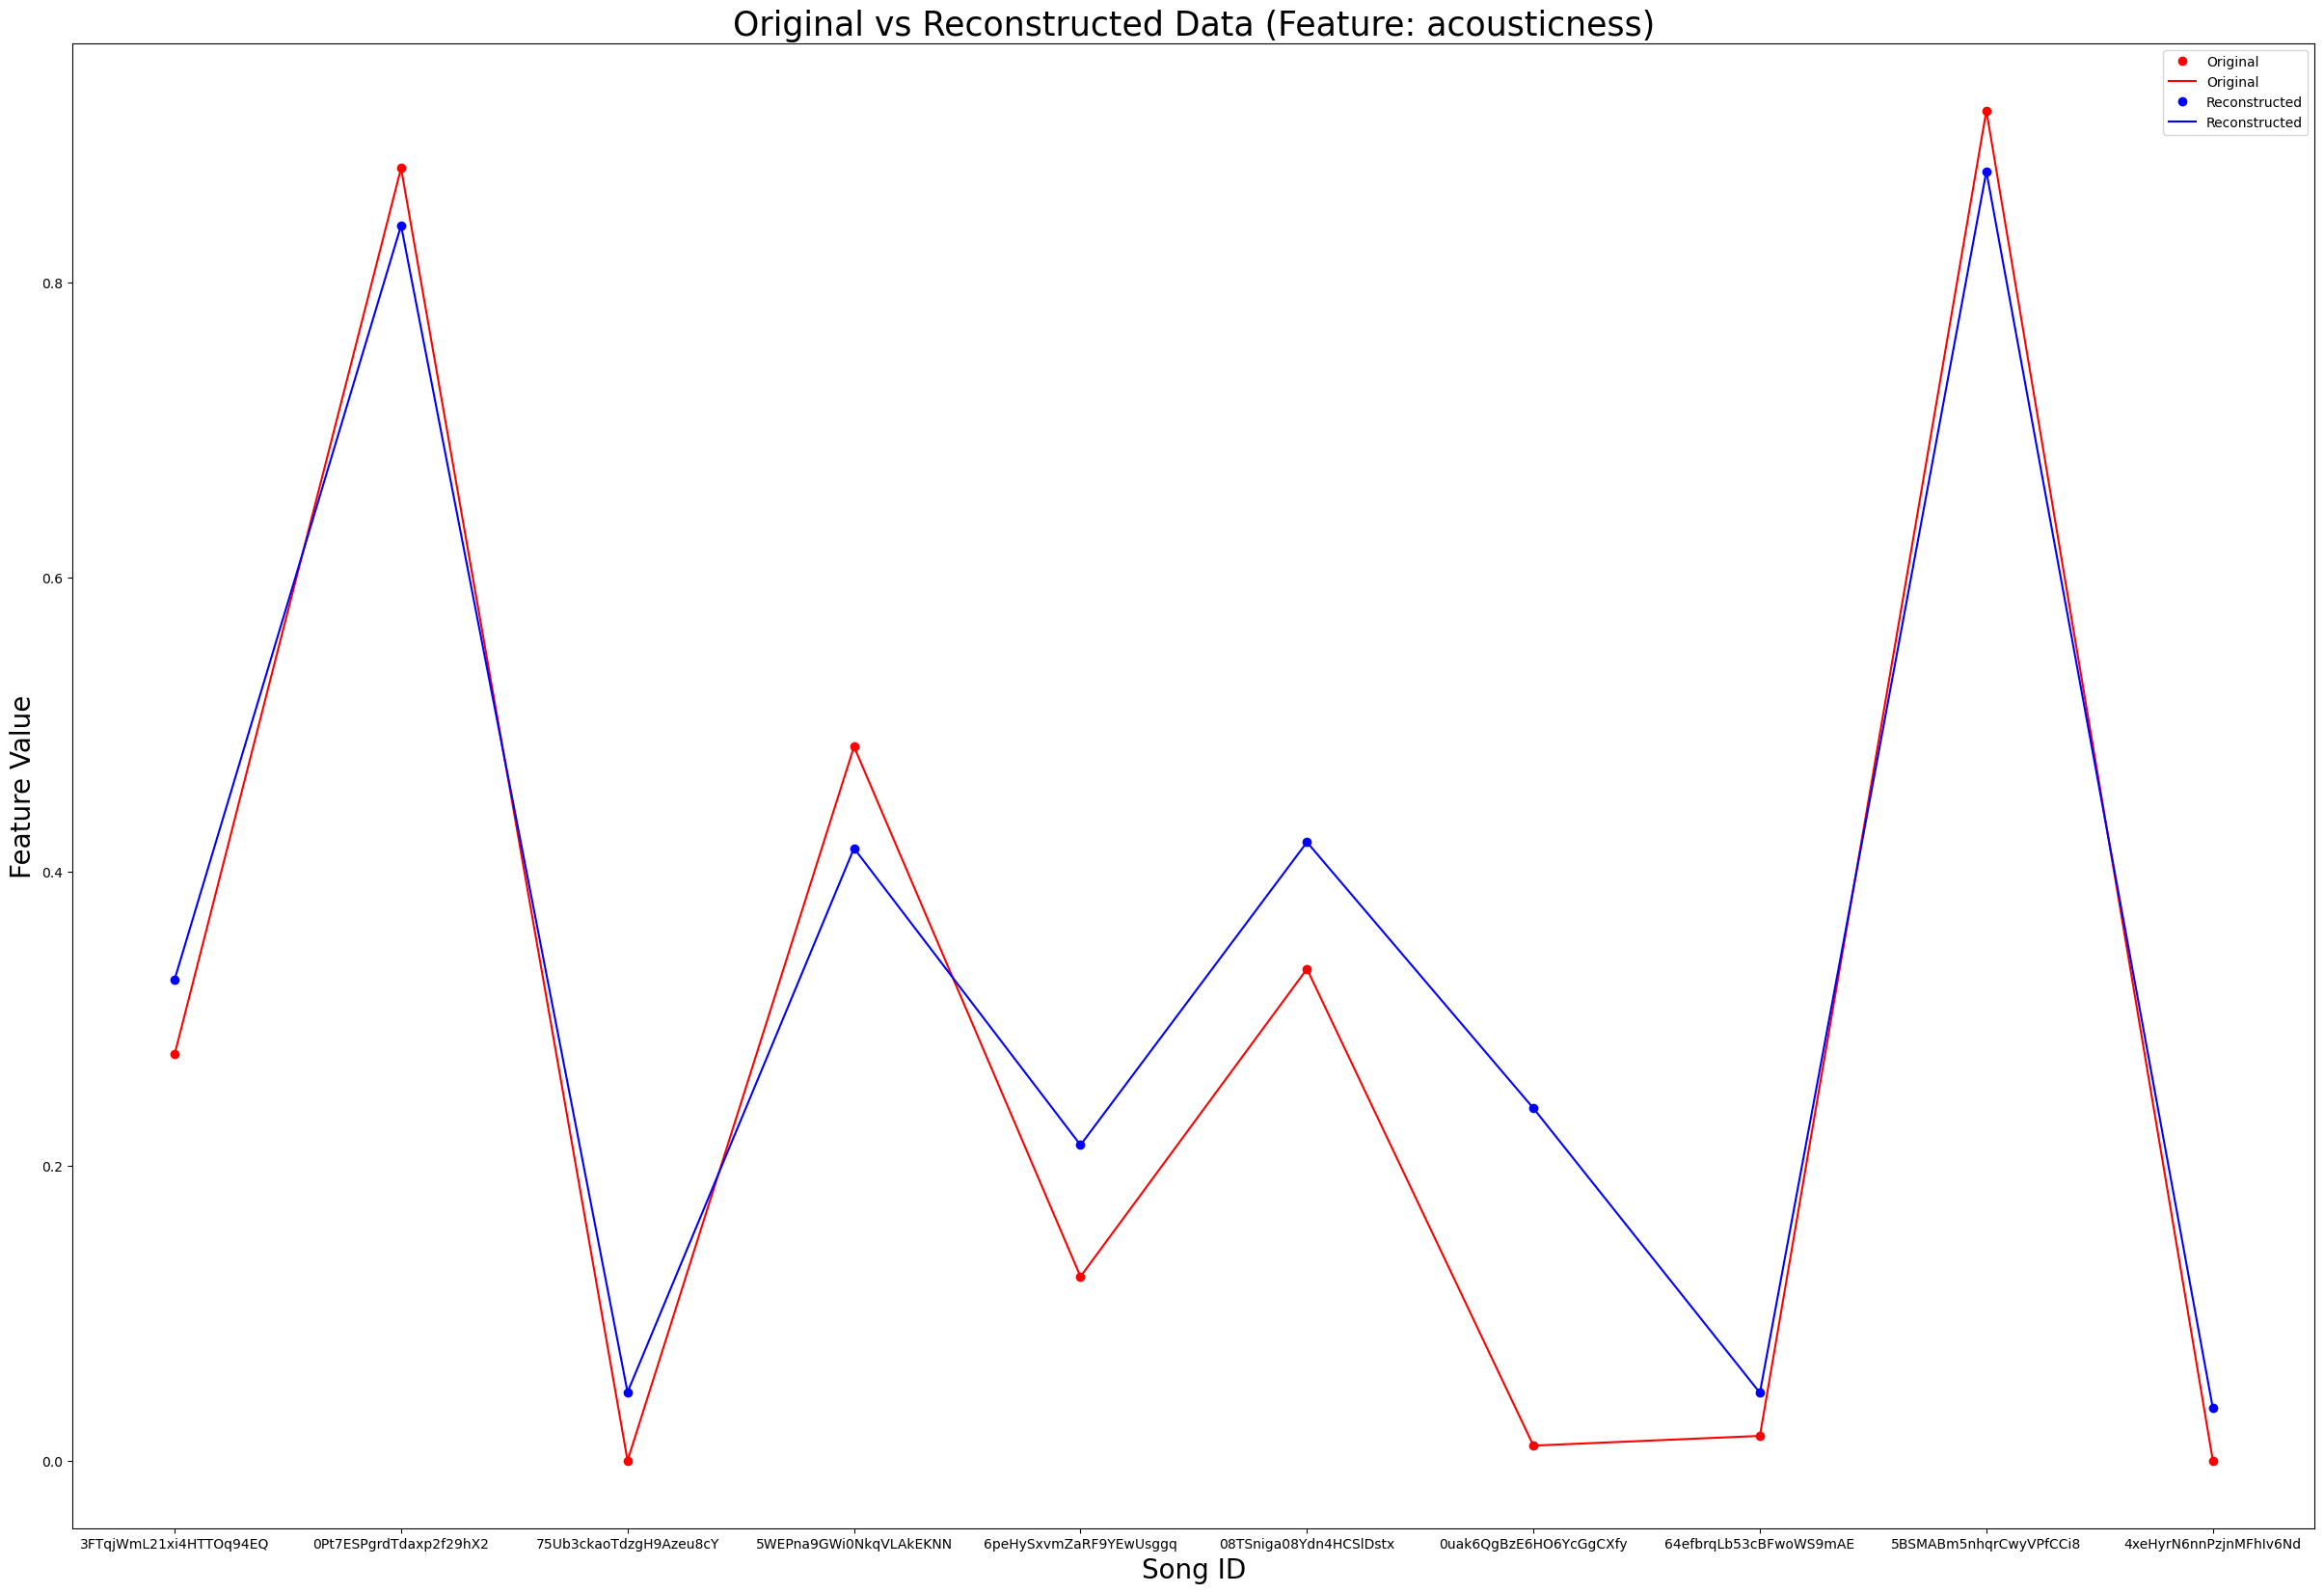

In [6]:
plt.figure(figsize=(30,20))
feature_index = 4  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

In [7]:
original_data

array([[ 7.25000e-01,  5.53000e-01, -6.31900e+00, ...,  1.85000e-01,
         7.29000e-01,  9.00090e+01],
       [ 2.77000e-01,  1.64000e-01, -1.67430e+01, ...,  3.35000e-01,
         1.84000e-01,  8.93080e+01],
       [ 4.86000e-01,  9.27000e-01, -4.84500e+00, ...,  9.52000e-02,
         3.77000e-01,  1.35540e+02],
       ...,
       [ 2.10000e-01,  2.87000e-01, -9.64500e+00, ...,  1.02000e-01,
         1.01000e-01,  8.31060e+01],
       [ 7.17000e-01,  7.07000e-01, -9.32600e+00, ...,  1.01000e-01,
         6.75000e-01,  1.22001e+02],
       [ 7.68000e-01,  5.74000e-01, -1.09360e+01, ...,  1.52000e-01,
         9.08000e-01,  1.34998e+02]])

In [8]:
decoded_data

array([[ 0.8199731 , -0.02257201,  0.2961558 , ..., -0.35482118,
         0.7436646 , -0.8007457 ],
       [-1.1987289 , -1.4092922 , -1.123275  , ...,  0.3028719 ,
        -0.8375868 , -0.8885564 ],
       [-0.18162657,  0.73137695,  0.7812743 , ..., -0.16385685,
        -0.04010531,  0.39561567],
       ...,
       [-1.2317578 , -0.9191241 , -0.6178974 , ..., -0.02141903,
        -0.9586531 , -0.9840166 ],
       [ 0.9032268 ,  0.29608208,  0.04467416, ..., -0.75972617,
         0.28903508,  0.07762621],
       [ 1.1943231 , -0.17099158, -0.31653124, ..., -0.840448  ,
         0.7073858 ,  0.41329002]], dtype=float32)

In [86]:
first_column=d[:,0]
first_column

array(['3FTqjWmL21xi4HTTOq94EQ', '0Pt7ESPgrdTdaxp2f29hX2',
       '75Ub3ckaoTdzgH9Azeu8cY', ..., '3Sk2I9TXq0GuYJGSQ6fV74',
       '4eBQN1fTfiKBnP2LGTduA7', '5ALzkZxECov3Py5A6iA3I5'], dtype=object)

In [88]:
numeric_columns = d[:, 1:]
numeric_columns

array([[0.725, 0.553, -6.319, ..., 0.185, 0.729, 90.009],
       [0.277, 0.164, -16.743, ..., 0.335, 0.184, 89.308],
       [0.486, 0.927, -4.845, ..., 0.0952, 0.377, 135.54],
       ...,
       [0.424, 0.4, -8.171, ..., 0.106, 0.325, 133.484],
       [0.545, 0.926, -3.974, ..., 0.185, 0.362, 75.002],
       [0.193, 0.98, -2.035, ..., 0.2, 0.147, 77.292]], dtype=object)

In [96]:
d[:200]

array([['3FTqjWmL21xi4HTTOq94EQ', 0.725, 0.553, ..., 0.185, 0.729,
        90.009],
       ['0Pt7ESPgrdTdaxp2f29hX2', 0.277, 0.164, ..., 0.335, 0.184,
        89.308],
       ['75Ub3ckaoTdzgH9Azeu8cY', 0.486, 0.927, ..., 0.0952, 0.377,
        135.54],
       ...,
       ['0lwJtVh8ere7r9dcBSzEfP', 0.599, 0.224, ..., 0.0628, 0.512,
        120.828],
       ['4wdXuLxKTzewWCdDHyQlVt', 0.188, 0.651, ..., 0.0942, 0.0375,
        119.372],
       ['3qQo52IPYThArCPVXeL58G', 0.449, 0.895, ..., 0.807, 0.506,
        94.199]], dtype=object)

# Parametric Tanh activation

$$
\Large f(x) = \alpha \cdot \tanh(x) + \beta
$$

In [2]:
class ParametricTanh(tf.keras.layers.Layer):
    def __init__(self, alpha_init=1.5, beta_init=0.5, **kwargs):
        super(ParametricTanh, self).__init__(**kwargs)
        self.alpha_init = alpha_init
        self.beta_init = beta_init

    def build(self, input_shape):
        self.alpha = self.add_weight(name='alpha',
                                     shape=(1,),
                                     initializer=tf.keras.initializers.Constant(value=self.alpha_init),
                                     trainable=True)
        self.beta = self.add_weight(name='beta',
                                    shape=(1,),
                                    initializer=tf.keras.initializers.Constant(value=self.beta_init),
                                    trainable=True)
        super(ParametricTanh, self).build(input_shape)

    def call(self, x):
        return self.alpha * K.tanh(x) + self.beta

In [10]:
input_dim = scaled_features.shape[1]
encoding_dim = 5


input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation=ParametricTanh())(input_layer)
encoded = layers.Dropout(0.2)(encoded)
# decoded_additional=layers.Dense(encoding_dim,activation='tanh')(encoded)
# decoded_additional=layers.Dropout(0.2)(decoded_additional)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

# autoencoder = models.Model(input_layer, decoded)
# encoder = models.Model(input_layer, encoded)

# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)
decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)
decoder = models.Model(decoder_input, decoder_output)
optimizer = optimizers.Adafactor(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

encoded_data = encoder.predict(scaled_features)
decoded_data = decoder.predict(encoded_data)


Epoch 1/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 18s 663us/step - loss: 0.5222 - val_loss: 0.2086
Epoch 2/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 648us/step - loss: 0.3309 - val_loss: 0.2086
Epoch 3/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 665us/step - loss: 0.3321 - val_loss: 0.2060
Epoch 4/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 643us/step - loss: 0.3316 - val_loss: 0.2077
Epoch 5/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 650us/step - loss: 0.3318 - val_loss: 0.2074
Epoch 6/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 653us/step - loss: 0.3314 - val_loss: 0.2076
Epoch 7/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 656us/step - loss: 0.3308 - val_loss: 0.2072
Epoch 8/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 665us/step - loss: 0.3298 - val_loss: 0.2066
Epoch 9/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 672us/step - loss: 0.3306 - val_loss: 0.2075
Epoch 10/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 17s 671us/step - loss: 0.3305 - val_loss: 0.2074
Epoch 11/50
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 16s 637us/step - loss: 0

In [11]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 7.25000e-01  5.53000e-01 -6.31900e+00  3.40000e-02  2.76000e-01
   7.02000e-06  1.85000e-01  7.29000e-01  9.00090e+01]
 [ 2.77000e-01  1.64000e-01 -1.67430e+01  3.73000e-02  8.78000e-01
   1.81000e-04  3.35000e-01  1.84000e-01  8.93080e+01]
 [ 4.86000e-01  9.27000e-01 -4.84500e+00  4.28000e-02  2.95000e-06
   1.45000e-02  9.52000e-02  3.77000e-01  1.35540e+02]
 [ 4.11000e-01  4.42000e-01 -1.27450e+01  2.70000e-02  4.85000e-01
   9.26000e-01  1.91000e-01  1.72000e-01  1.74019e+02]
 [ 7.48000e-01  6.60000e-01 -4.64800e+00  2.71000e-01  1.25000e-01
   0.00000e+00  7.83000e-02  4.00000e-01  7.55830e+01]]

Reconstructed Data (first 5 samples):
[[ 6.8885338e-01  6.3463682e-01 -7.2340970e+00  6.5317132e-02
   3.3023235e-01  1.7969526e-02  1.5200546e-01  6.5546882e-01
   9.7419235e+01]
 [ 3.1902900e-01  2.5961301e-01 -1.5274691e+01  6.3131772e-02
   8.3257949e-01  9.6316881e-02  2.8371418e-01  2.2189763e-01
   9.4802528e+01]
 [ 5.0264287e-01  8.3348095e-01 -

In [12]:
og_data=data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
mse = np.mean(np.square(og_data - decoded_data_original_scale), axis=1)
print(f"\nMean Squared Error (first 5 samples): {mse[:5]}")


Mean Squared Error (first 5 samples): 882616     6.196411
621408     3.596969
927704     0.661510
439351    22.863590
266036    10.088767
dtype: float64


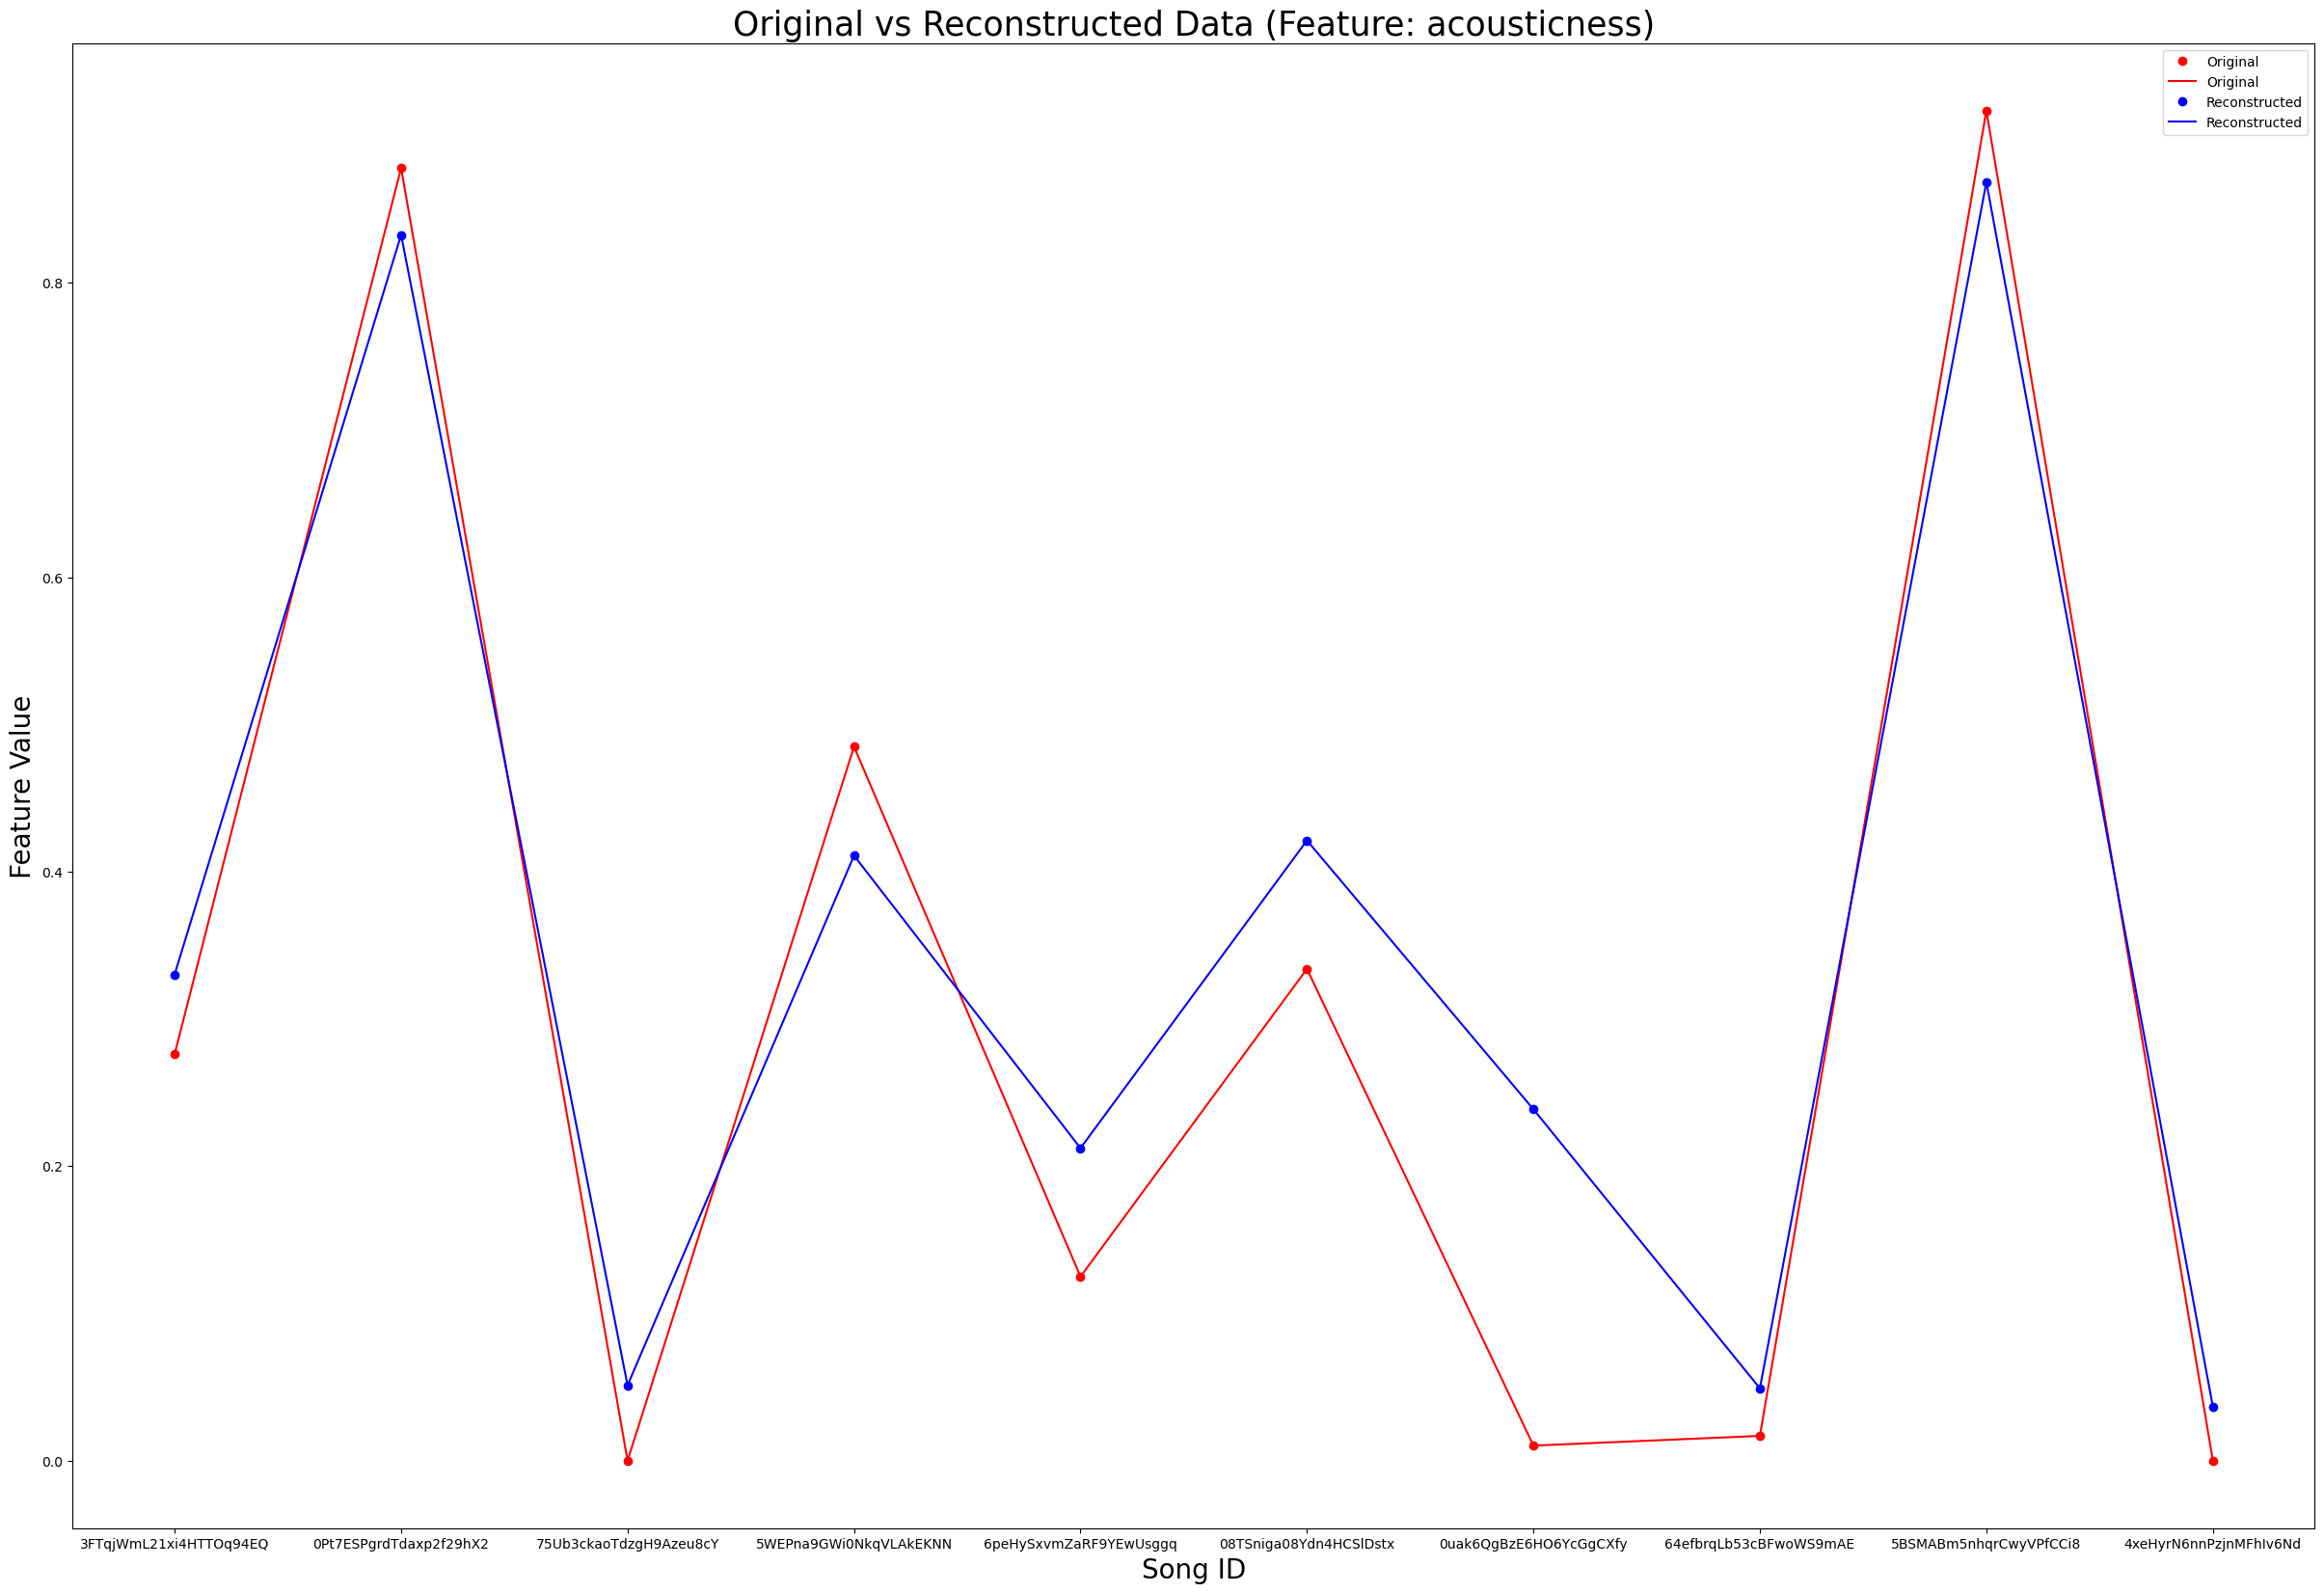

In [13]:
plt.figure(figsize=(30,20))
feature_index = 4  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

$$
\Large f(x) = \alpha \cdot \tanh(\beta \cdot x)
$$

## 9-> 9 -> 9

In [3]:
class AdvancedParametricTanh(tf.keras.layers.Layer):
    def __init__(self, input_dim, alpha_init=1.5, beta_init=0.5, **kwargs):
        super(AdvancedParametricTanh, self).__init__(**kwargs)
        self.input_dim = input_dim
        self.alpha_init = alpha_init
        self.beta_init = beta_init

    def build(self, input_shape):
        self.alpha = self.add_weight(name='alpha',
                                     shape=(self.input_dim,),
                                     initializer=tf.keras.initializers.Constant(value=self.alpha_init),
                                     trainable=True)
        self.beta = self.add_weight(name='beta',
                                    shape=(self.input_dim,),
                                    initializer=tf.keras.initializers.Constant(value=self.beta_init),
                                    trainable=True)
        super(AdvancedParametricTanh, self).build(input_shape)

    def call(self, x):
        return self.alpha * tf.math.tanh(self.beta * x)


In [ ]:
input_dim = 11  # Original input dimension
encoding_dim = 5  # Dimension of the encoded representation
input_layer = layers.Input(shape=(input_dim,))
encoded = AdvancedParametricTanh(input_dim)(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_features, scaled_features, epochs=200, batch_size=32, shuffle=True, validation_split=0.2)

encoder = models.Model(input_layer, encoded)

decoder_input = layers.Input(shape=(input_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)
decoder = models.Model(decoder_input, decoder_output)
encoded_data = encoder.predict(scaled_features)
decoded_data = decoder.predict(encoded_data)
advanced_parametric_tanh_layer = autoencoder.layers[1]
alpha_values = advanced_parametric_tanh_layer.get_weights()[0]
beta_values = advanced_parametric_tanh_layer.get_weights()[1]

print("Best alpha values:", alpha_values)
print("Best beta values:", beta_values)

autoencoder.save('model_v1.h5') # save model
np.save('encoded_song_data.npy', encoded_data) # save encoded data



Epoch 1/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 572us/step - loss: 0.1339 - val_loss: 1.1852e-04
Epoch 2/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 16s 559us/step - loss: 9.2708e-05 - val_loss: 6.7393e-05
Epoch 3/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 16s 554us/step - loss: 5.0666e-05 - val_loss: 5.1559e-05
Epoch 4/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 576us/step - loss: 3.9366e-05 - val_loss: 2.3667e-05
Epoch 5/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 586us/step - loss: 3.3882e-05 - val_loss: 4.6713e-05
Epoch 6/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 18s 631us/step - loss: 3.2805e-05 - val_loss: 1.7460e-05
Epoch 7/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 599us/step - loss: 3.0465e-05 - val_loss: 5.0259e-05
Epoch 8/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 579us/step - loss: 2.8737e-05 - val_loss: 1.8218e-05
Epoch 9/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 574us/step - loss: 2.9010e-05 - val_loss: 2.9877e-05
Epoch 10/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 576us/step - loss: 2.6987e-05 - val

28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 570us/step - loss: 2.4715e-05 - val_loss: 3.5586e-05
Epoch 119/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 578us/step - loss: 2.5111e-05 - val_loss: 1.3075e-05
Epoch 120/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 569us/step - loss: 2.5043e-05 - val_loss: 1.2360e-05
Epoch 121/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 572us/step - loss: 2.5061e-05 - val_loss: 1.7915e-05
Epoch 122/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 569us/step - loss: 2.3643e-05 - val_loss: 1.3974e-05
Epoch 123/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 586us/step - loss: 2.4353e-05 - val_loss: 4.6025e-05
Epoch 124/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 18s 609us/step - loss: 2.5224e-05 - val_loss: 7.4527e-05
Epoch 125/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 16s 558us/step - loss: 2.4535e-05 - val_loss: 2.1178e-05
Epoch 126/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 16s 562us/step - loss: 2.5082e-05 - val_loss: 2.4888e-05
Epoch 127/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 17s 570us/step - loss: 2.3729e-

In [5]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 4.83000e-01  3.03000e-01  4.00000e+00 -1.00580e+01  6.94000e-01
   0.00000e+00  1.15000e-01  1.39000e-01  1.33406e+02]
 [ 5.72000e-01  4.54000e-01  3.00000e+00 -1.02860e+01  4.77000e-01
   1.37000e-05  9.74000e-02  5.15000e-01  1.40182e+02]
 [ 4.09000e-01  2.34000e-01  3.00000e+00 -1.37110e+01  3.38000e-01
   5.00000e-05  8.95000e-02  1.45000e-01  1.39832e+02]
 [ 3.92000e-01  2.51000e-01  1.00000e+01 -9.84500e+00  8.07000e-01
   0.00000e+00  7.97000e-02  5.08000e-01  2.04961e+02]
 [ 4.30000e-01  7.91000e-01  6.00000e+00 -5.41900e+00  7.26000e-02
   1.93000e-02  1.10000e-01  2.17000e-01  1.71864e+02]]

Reconstructed Data (first 5 samples):
[[ 4.82817054e-01  3.02918345e-01  3.99647570e+00 -1.00306025e+01
   6.94795609e-01 -9.66004955e-05  1.14731841e-01  1.37952164e-01
   1.33435333e+02]
 [ 5.71942747e-01  4.53686863e-01  2.99393535e+00 -1.02681723e+01
   4.77438211e-01 -4.30457221e-05  9.69815478e-02  5.15556395e-01
   1.40207703e+02]
 [ 4.08730119e-

In [9]:
og_data=data[['danceability', 'energy','key', 'loudness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
mse = np.mean(np.square(og_data - decoded_data_original_scale), axis=1)
print(f"\nMean Squared Error (first 5 samples): {mse[:5]}")


Mean Squared Error (first 5 samples): 0    0.000181
1    0.000113
2    0.000425
3    0.016398
4    0.000559
dtype: float64


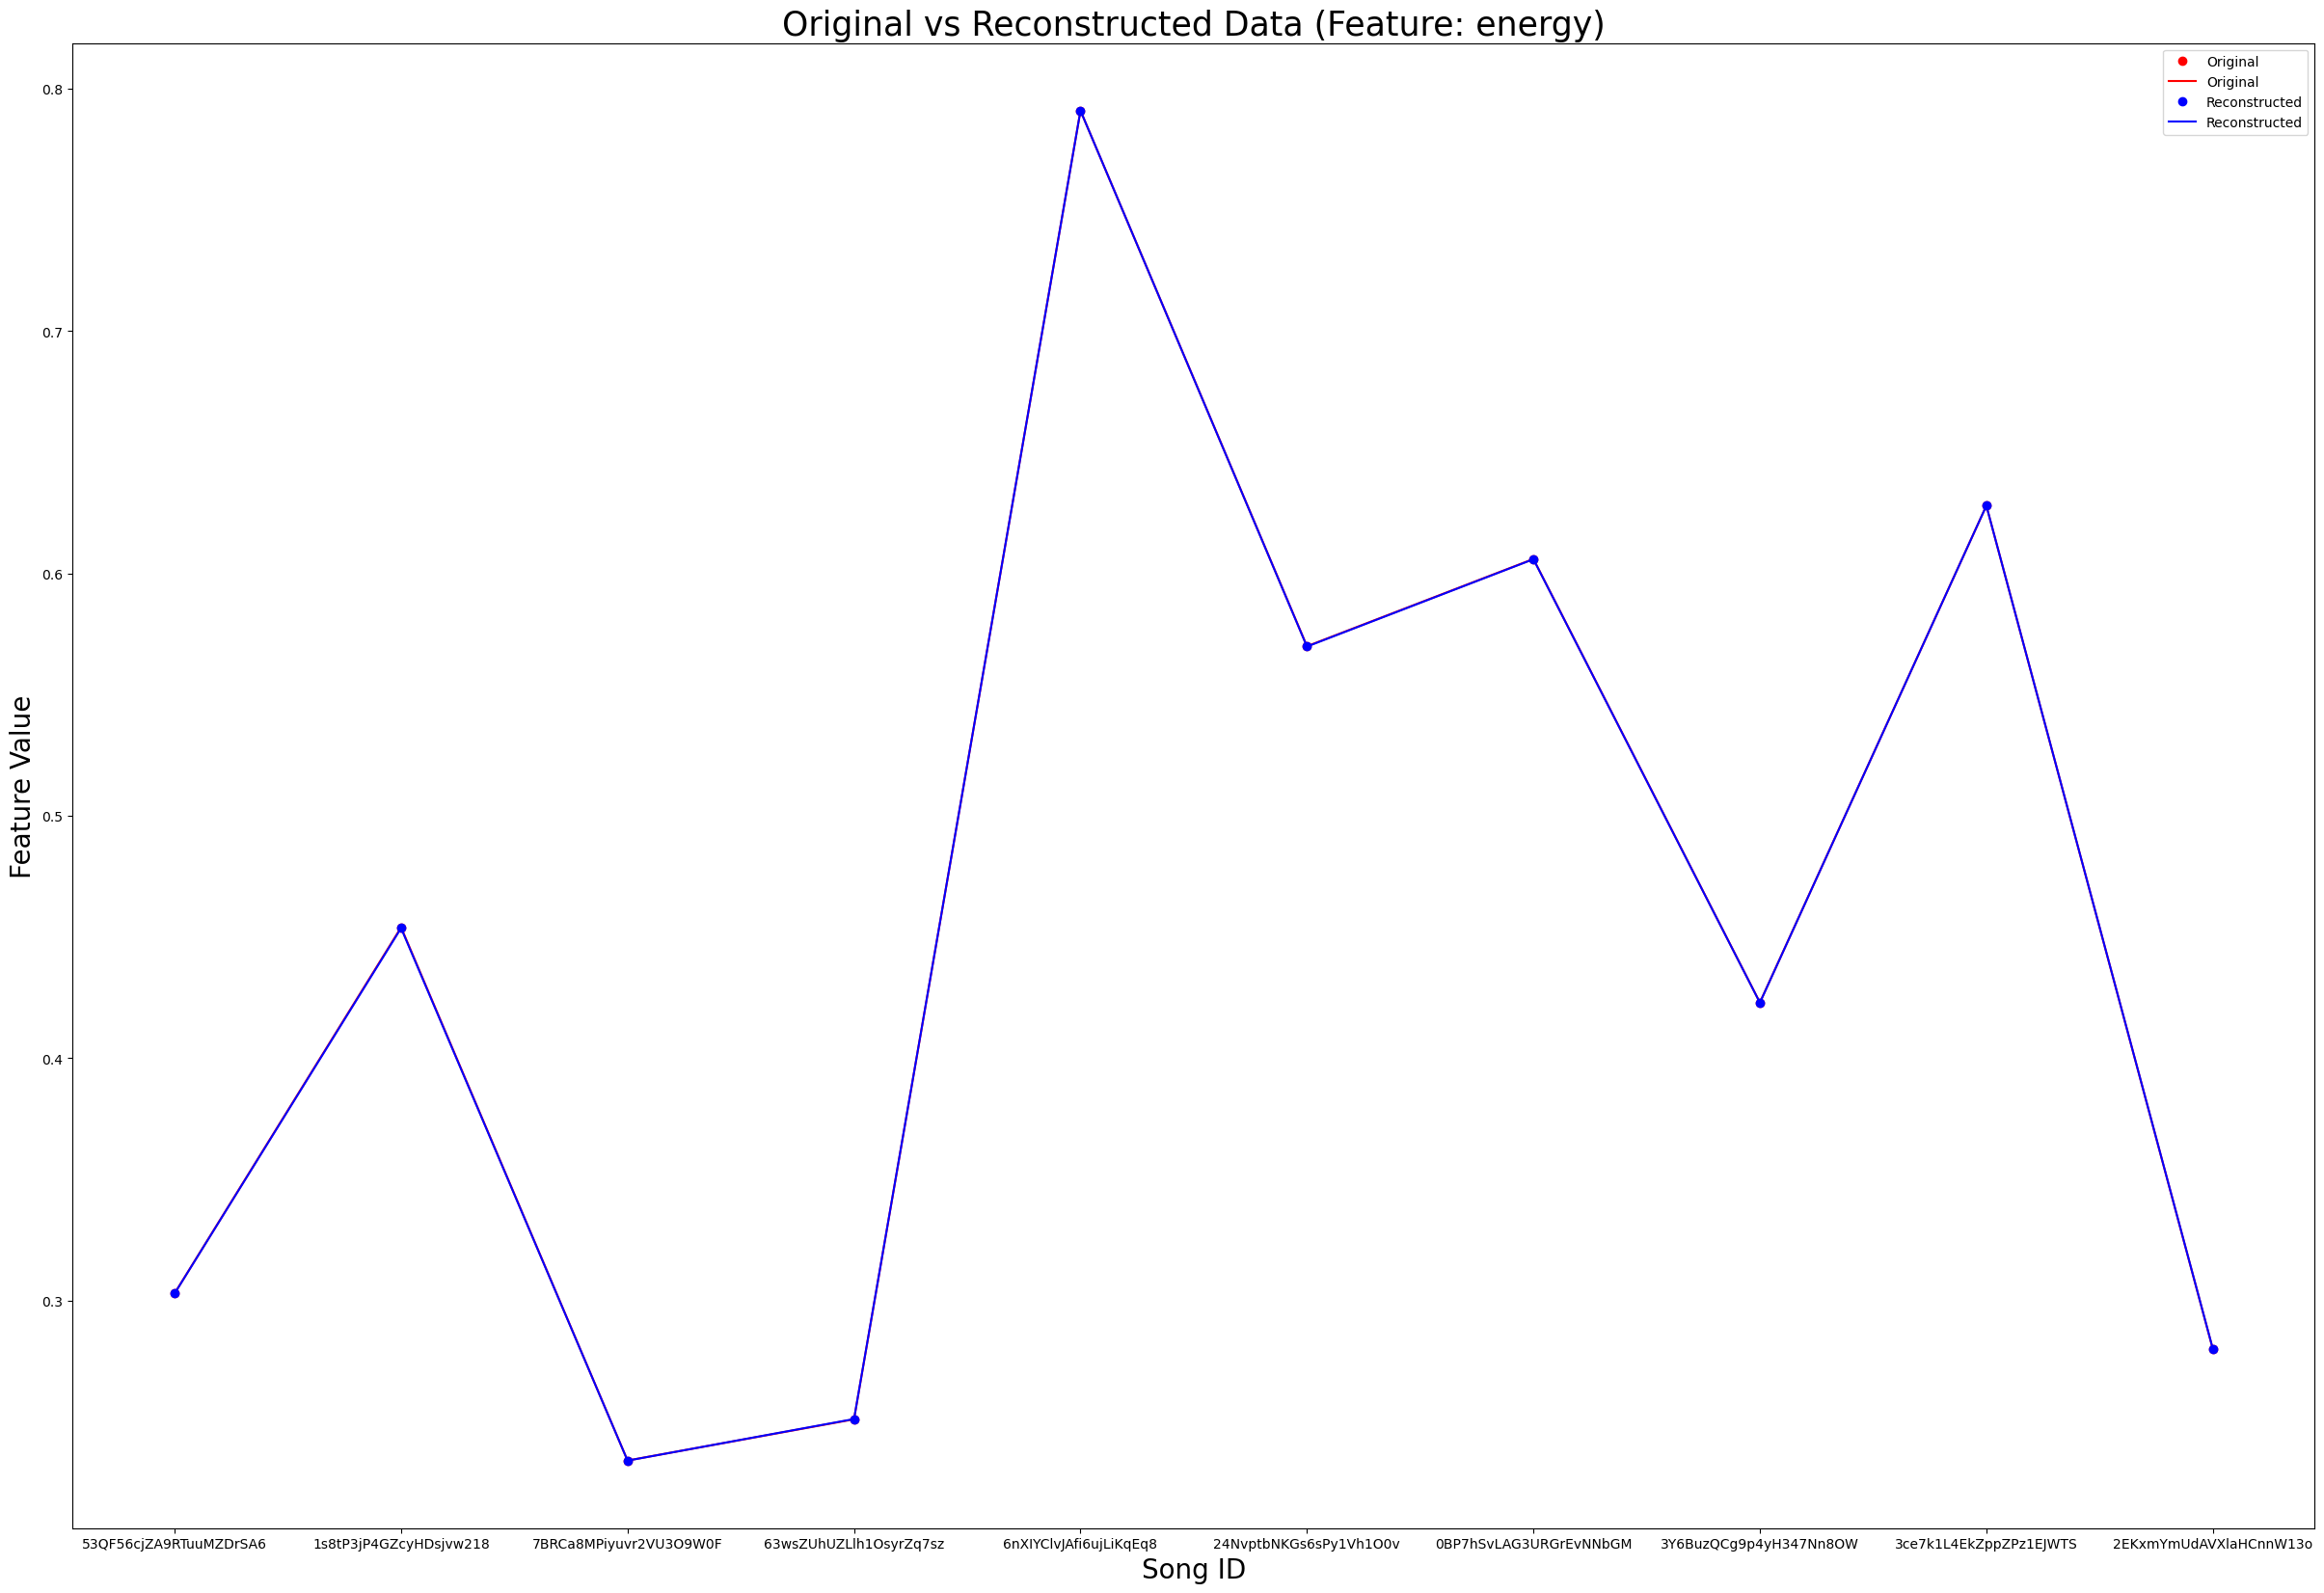

In [10]:
plt.figure(figsize=(30,20))
feature_index = 1  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

In [9]:
tolerance = 0.01
diff = np.abs(scaled_features - decoded_data)
accurate_count = np.sum(diff < tolerance)
total_elements = np.prod(scaled_features.shape)
accuracy_percentage = (accurate_count / total_elements) * 100
print(f"Reconstruction accuracy percentage: {accuracy_percentage:.2f}%")

Reconstruction accuracy percentage: 98.69%


## Introduce Noise to check accuracy of model

In [24]:
noisy_input = scaled_features + np.random.normal(0, 0.5, scaled_features.shape)
decoded_noisy_data = autoencoder.predict(noisy_input)

31250/31250 ━━━━━━━━━━━━━━━━━━━━ 13s 404us/step


In [25]:
decoded_data_original_scale = scaler.inverse_transform(decoded_noisy_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 7.25000e-01  5.53000e-01 -6.31900e+00  3.40000e-02  2.76000e-01
   7.02000e-06  1.85000e-01  7.29000e-01  9.00090e+01]
 [ 2.77000e-01  1.64000e-01 -1.67430e+01  3.73000e-02  8.78000e-01
   1.81000e-04  3.35000e-01  1.84000e-01  8.93080e+01]
 [ 4.86000e-01  9.27000e-01 -4.84500e+00  4.28000e-02  2.95000e-06
   1.45000e-02  9.52000e-02  3.77000e-01  1.35540e+02]
 [ 4.11000e-01  4.42000e-01 -1.27450e+01  2.70000e-02  4.85000e-01
   9.26000e-01  1.91000e-01  1.72000e-01  1.74019e+02]
 [ 7.48000e-01  6.60000e-01 -4.64800e+00  2.71000e-01  1.25000e-01
   0.00000e+00  7.83000e-02  4.00000e-01  7.55830e+01]]

Reconstructed Data (first 5 samples):
[[ 6.0154533e-01  5.7509243e-01 -5.6892076e+00  6.8378702e-02
   3.5416299e-01  1.3712364e-01  2.1022120e-01  7.4703956e-01
   9.1102135e+01]
 [ 3.3307335e-01  1.8703352e-01 -1.7741550e+01  4.9306704e-03
   8.9388698e-01  1.1213102e-01  3.8683149e-01  1.7205587e-01
   8.6998550e+01]
 [ 5.2332062e-01  8.4965158e-01 -

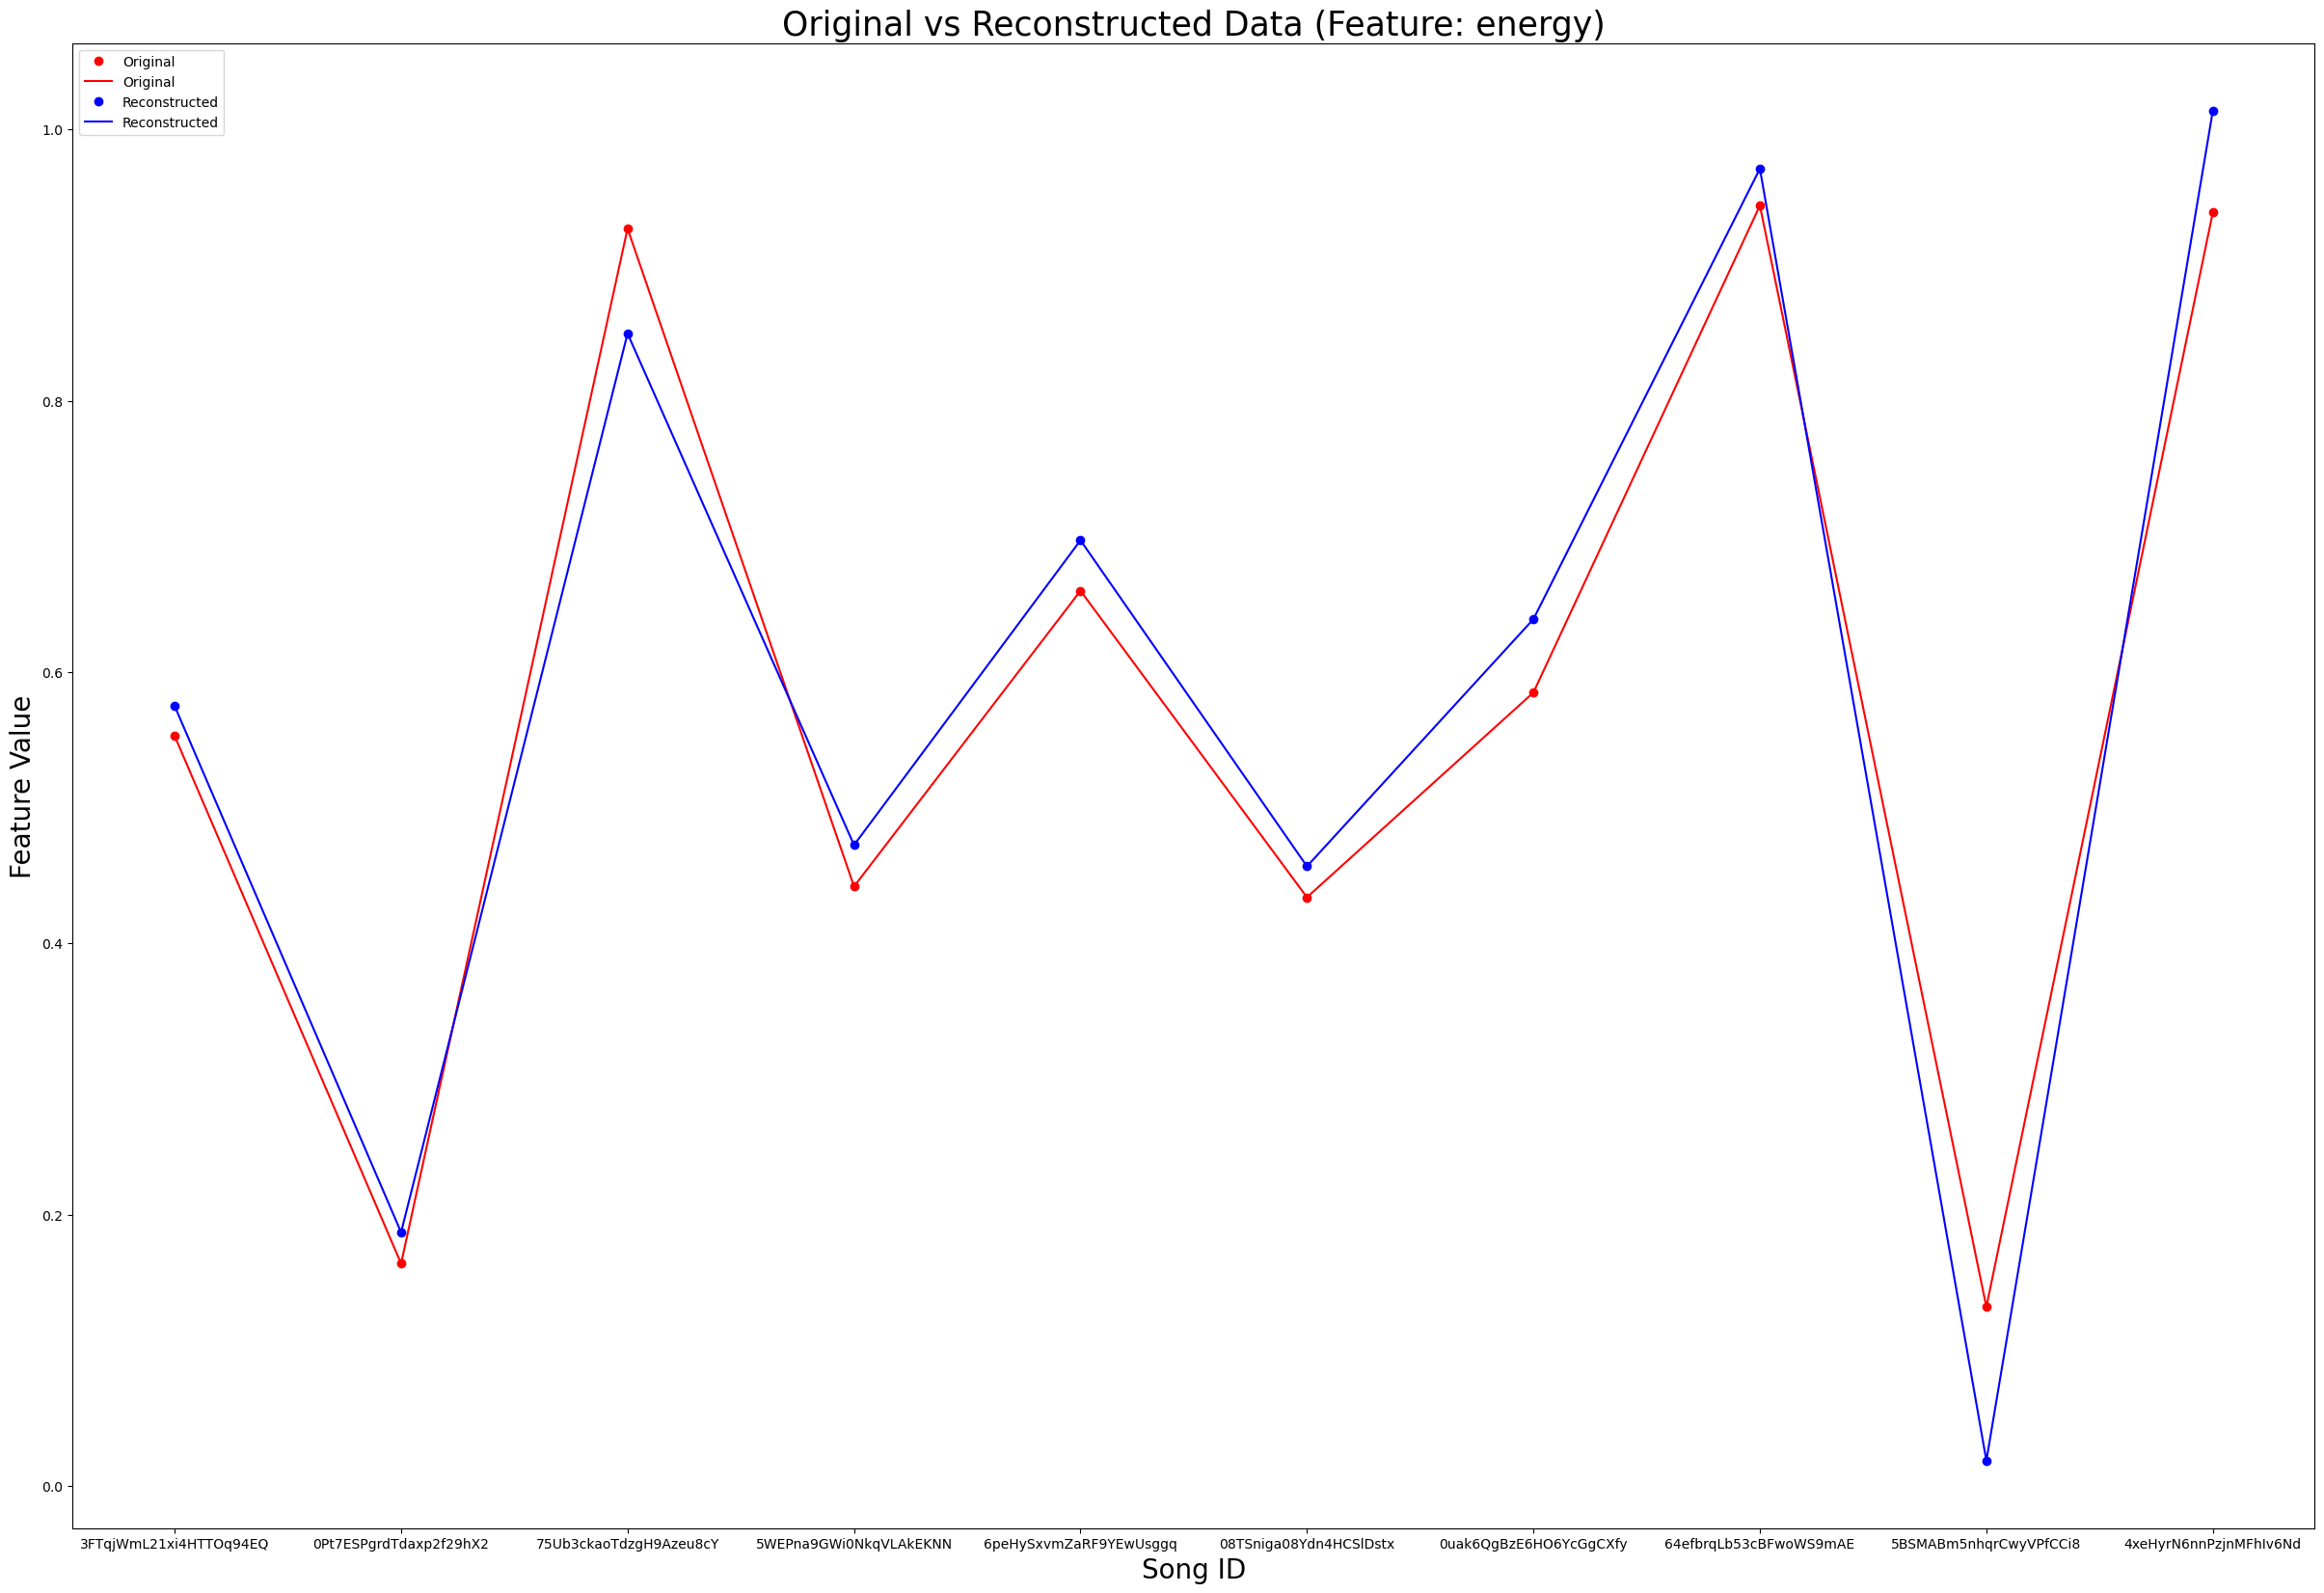

In [26]:
plt.figure(figsize=(30,20))
feature_index = 1  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

In [27]:
tolerance = 0.01
diff = np.abs(noisy_input - decoded_noisy_data)
accurate_count = np.sum(diff < tolerance)
total_elements = np.prod(scaled_features.shape)
accuracy_percentage = (accurate_count / total_elements) * 100
print(f"Reconstruction accuracy percentage: {accuracy_percentage:.2f}%")

Reconstruction accuracy percentage: 94.65%


## Original architecture 9->5->9

In [15]:
input_dim = 9 
encoding_dim = 5
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation=AdvancedParametricTanh(encoding_dim))(input_layer)
bottleneck = layers.Dense(encoding_dim)(encoded)


decoded = layers.Dense(input_dim, activation='linear')(bottleneck)


autoencoder = models.Model(input_layer, decoded)

autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

encoder = models.Model(input_layer, encoded)

decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)
decoder = models.Model(decoder_input, decoder_output)

encoded_data = encoder.predict(scaled_features)
decoded_data = decoder.predict(encoded_data)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 675us/step - loss: 0.5601 - val_loss: 0.1896
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 638us/step - loss: 0.1861 - val_loss: 0.1770
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 597us/step - loss: 0.1790 - val_loss: 0.1763
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 603us/step - loss: 0.1780 - val_loss: 0.1759
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 604us/step - loss: 0.1767 - val_loss: 0.1759
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 605us/step - loss: 0.1761 - val_loss: 0.1758
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 604us/step - loss: 0.1766 - val_loss: 0.1758
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 609us/step - loss: 0.1753 - val_loss: 0.1758
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 615us/step - loss: 0.1772 - val_loss: 0.1757
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 618us/step - loss: 0.1772 - val_loss: 0.1757
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 606us/step - loss: 0.1759 - val_loss: 0.1756
Epoch 12

In [16]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 7.25000e-01  5.53000e-01 -6.31900e+00  3.40000e-02  2.76000e-01
   7.02000e-06  1.85000e-01  7.29000e-01  9.00090e+01]
 [ 2.77000e-01  1.64000e-01 -1.67430e+01  3.73000e-02  8.78000e-01
   1.81000e-04  3.35000e-01  1.84000e-01  8.93080e+01]
 [ 4.86000e-01  9.27000e-01 -4.84500e+00  4.28000e-02  2.95000e-06
   1.45000e-02  9.52000e-02  3.77000e-01  1.35540e+02]
 [ 4.11000e-01  4.42000e-01 -1.27450e+01  2.70000e-02  4.85000e-01
   9.26000e-01  1.91000e-01  1.72000e-01  1.74019e+02]
 [ 7.48000e-01  6.60000e-01 -4.64800e+00  2.71000e-01  1.25000e-01
   0.00000e+00  7.83000e-02  4.00000e-01  7.55830e+01]]

Reconstructed Data (first 5 samples):
[[ 6.20899260e-01  5.45352459e-01 -1.10038223e+01  1.51295796e-01
   4.65852439e-01  2.70351052e-01  2.29930371e-01  5.60962498e-01
   1.21631203e+02]
 [ 4.97116834e-01  5.61690152e-01 -1.20732889e+01  1.29521653e-01
   3.89844537e-01  5.20878851e-01  2.37524346e-01  3.18456292e-01
   1.12836990e+02]
 [ 5.59654295e-

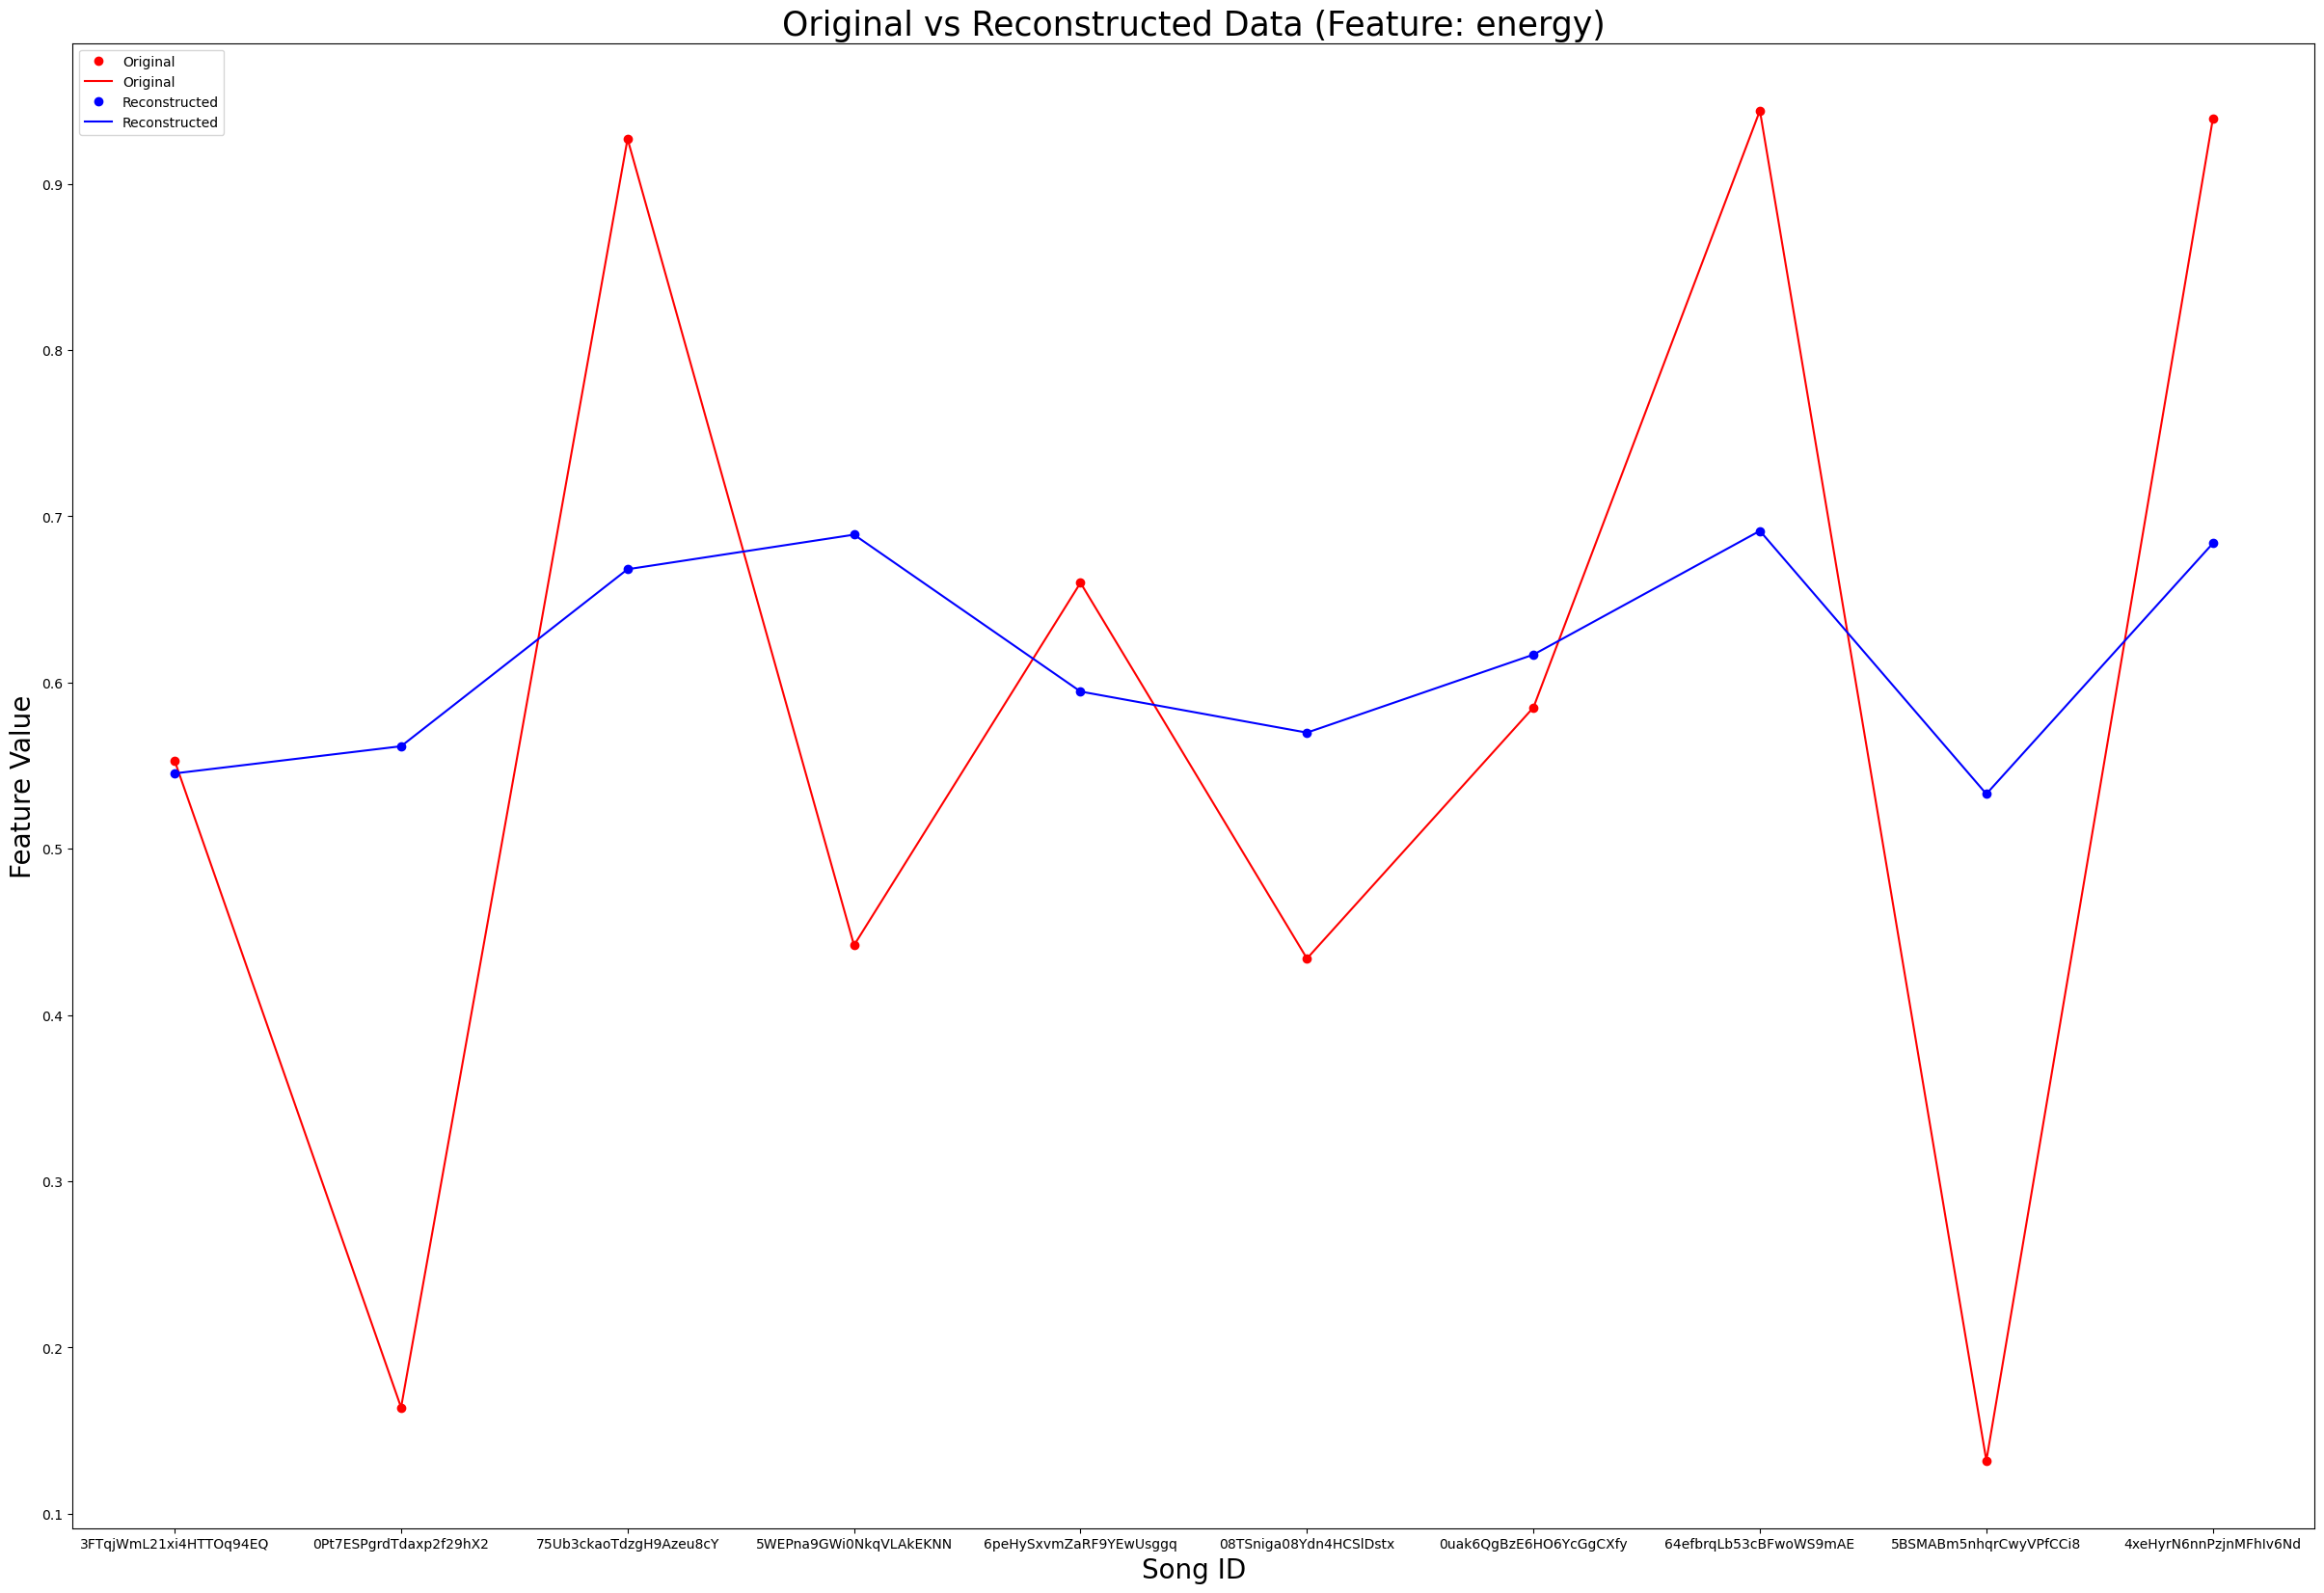

In [18]:
plt.figure(figsize=(30,20))
feature_index = 1  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

In [14]:
tolerance = 0.01
diff = np.abs(scaled_features - decoded_data)
accurate_count = np.sum(diff < tolerance)
total_elements = np.prod(scaled_features.shape)
accuracy_percentage = (accurate_count / total_elements) * 100
print(f"Reconstruction accuracy percentage: {accuracy_percentage:.2f}%")

Reconstruction accuracy percentage: 96.96%


# Gradual Dimensionality Reduction

In [14]:
class AdvancedParametricTanh(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        super(AdvancedParametricTanh, self).__init__(**kwargs)
        self.units = units  # Number of units in the layer

    def build(self, input_shape):
        # Initialize alpha and beta with shape matching the output units
        self.alpha = self.add_weight(shape=(self.units,),  # Changed to self.units
                                     initializer=initializers.Ones(),
                                     trainable=True,
                                     name='alpha')
        self.beta = self.add_weight(shape=(self.units,),  # Changed to self.units
                                    initializer=initializers.Zeros(),
                                    trainable=True,
                                    name='beta')

        # Add a Dense layer to reduce the dimensionality
        self.dense = layers.Dense(self.units)  # This reduces the input to the desired number of units

    def call(self, inputs):
        # First reduce dimensionality
        reduced_inputs = self.dense(inputs)
        # Then apply the advanced parametric tanh function: alpha * tanh(inputs) + beta
        return self.alpha * tf.math.tanh(reduced_inputs) + self.beta

    def compute_output_shape(self, input_shape):
        # Output shape will have the number of units specified
        return (input_shape[0], self.units)  # Shape becomes (batch_size, units)


In [ ]:
input_dim = 9  # Updated input dimension (9)
encoding_dim = 5  # Dimension of the encoded representation

# Input layer
input_layer = layers.Input(shape=(input_dim,))

# Encoding phase: gradually reduce dimensions
encoded = AdvancedParametricTanh(7)(input_layer)  # 9 -> 7
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.1)(encoded)  # Reduced dropout rate

print("Shape after first encoding step (9 -> 7):", encoded.shape)

encoded = AdvancedParametricTanh(encoding_dim)(encoded)  # 7 -> 5
encoded = layers.BatchNormalization()(encoded)
encoded = layers.Dropout(0.1)(encoded)  # Reduced dropout rate

print("Shape after second encoding step (7 -> 5):", encoded.shape)

# Decoding phase: gradually reconstruct dimensions
decoded = layers.Dense(7, activation='linear')(encoded)  # 5 -> 7
decoded = layers.BatchNormalization()(decoded)
decoded = layers.Dropout(0.1)(decoded)  # Reduced dropout rate

decoded = layers.Dense(input_dim, activation='linear')(decoded)  # 7 -> 9

# Autoencoder Model
autoencoder = models.Model(input_layer, decoded)

# Compile with reduced learning rate
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = autoencoder.fit(scaled_features, scaled_features, 
                          epochs=200, 
                          batch_size=32, 
                          shuffle=True, 
                          validation_split=0.2,
                          callbacks=[early_stopping]
                         )

# Encoder model
encoder = models.Model(input_layer, encoded)

# Decoder model
decoder_input = layers.Input(shape=(encoding_dim,))  # Input shape is 5 (encoding_dim)

# First decode step: 5 -> 7
decoder_layer_1 = layers.Dense(7, activation='linear')(decoder_input)
decoder_layer_1 = layers.BatchNormalization()(decoder_layer_1)
decoder_layer_1 = layers.Dropout(0.1)(decoder_layer_1)

# Final decode step: 7 -> 9
decoder_output = layers.Dense(input_dim, activation='linear')(decoder_layer_1)

# Build the decoder model
decoder = models.Model(decoder_input, decoder_output)

# Predict encoded and decoded data
encoded_data = encoder.predict(scaled_features)
print("Encoded data shape:", encoded_data.shape)
decoded_data = decoder.predict(encoded_data)

# Extract alpha and beta values from each AdvancedParametricTanh layer
advanced_parametric_tanh_layers = [layer for layer in autoencoder.layers if isinstance(layer, AdvancedParametricTanh)]
alpha_values = [layer.get_weights()[0] for layer in advanced_parametric_tanh_layers]
beta_values = [layer.get_weights()[1] for layer in advanced_parametric_tanh_layers]

# Print alpha and beta values for each layer
for i, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
    print(f"Layer {i+1} alpha values:", alpha)
    print(f"Layer {i+1} beta values:", beta)
    
autoencoder.save('model_v1_gradual.h5')
np.save('encoded_song_data.npy', encoded_data)


Shape after first encoding step (9 -> 7): (None, 7)
Shape after second encoding step (7 -> 5): (None, 5)
Epoch 1/200
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 0.4434 - val_loss: 0.5032
Epoch 2/200
28954/28995 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.3829

In [13]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 4.83000e-01  3.03000e-01  4.00000e+00 -1.00580e+01  6.94000e-01
   0.00000e+00  1.15000e-01  1.39000e-01  1.33406e+02]
 [ 5.72000e-01  4.54000e-01  3.00000e+00 -1.02860e+01  4.77000e-01
   1.37000e-05  9.74000e-02  5.15000e-01  1.40182e+02]
 [ 4.09000e-01  2.34000e-01  3.00000e+00 -1.37110e+01  3.38000e-01
   5.00000e-05  8.95000e-02  1.45000e-01  1.39832e+02]
 [ 3.92000e-01  2.51000e-01  1.00000e+01 -9.84500e+00  8.07000e-01
   0.00000e+00  7.97000e-02  5.08000e-01  2.04961e+02]
 [ 4.30000e-01  7.91000e-01  6.00000e+00 -5.41900e+00  7.26000e-02
   1.93000e-02  1.10000e-01  2.17000e-01  1.71864e+02]]

Reconstructed Data (first 5 samples):
[[ 3.77340049e-01  3.64251643e-01  4.62688303e+00 -1.13843994e+01
   6.38825059e-01  3.43702078e-01  1.24711543e-01  1.19192176e-01
   1.23367836e+02]
 [ 6.47416353e-01  4.89832193e-01  5.21166039e+00 -9.30032063e+00
   5.06267309e-01  3.30482312e-02  1.13184497e-01  5.65964520e-01
   1.12664520e+02]
 [ 3.83569449e-

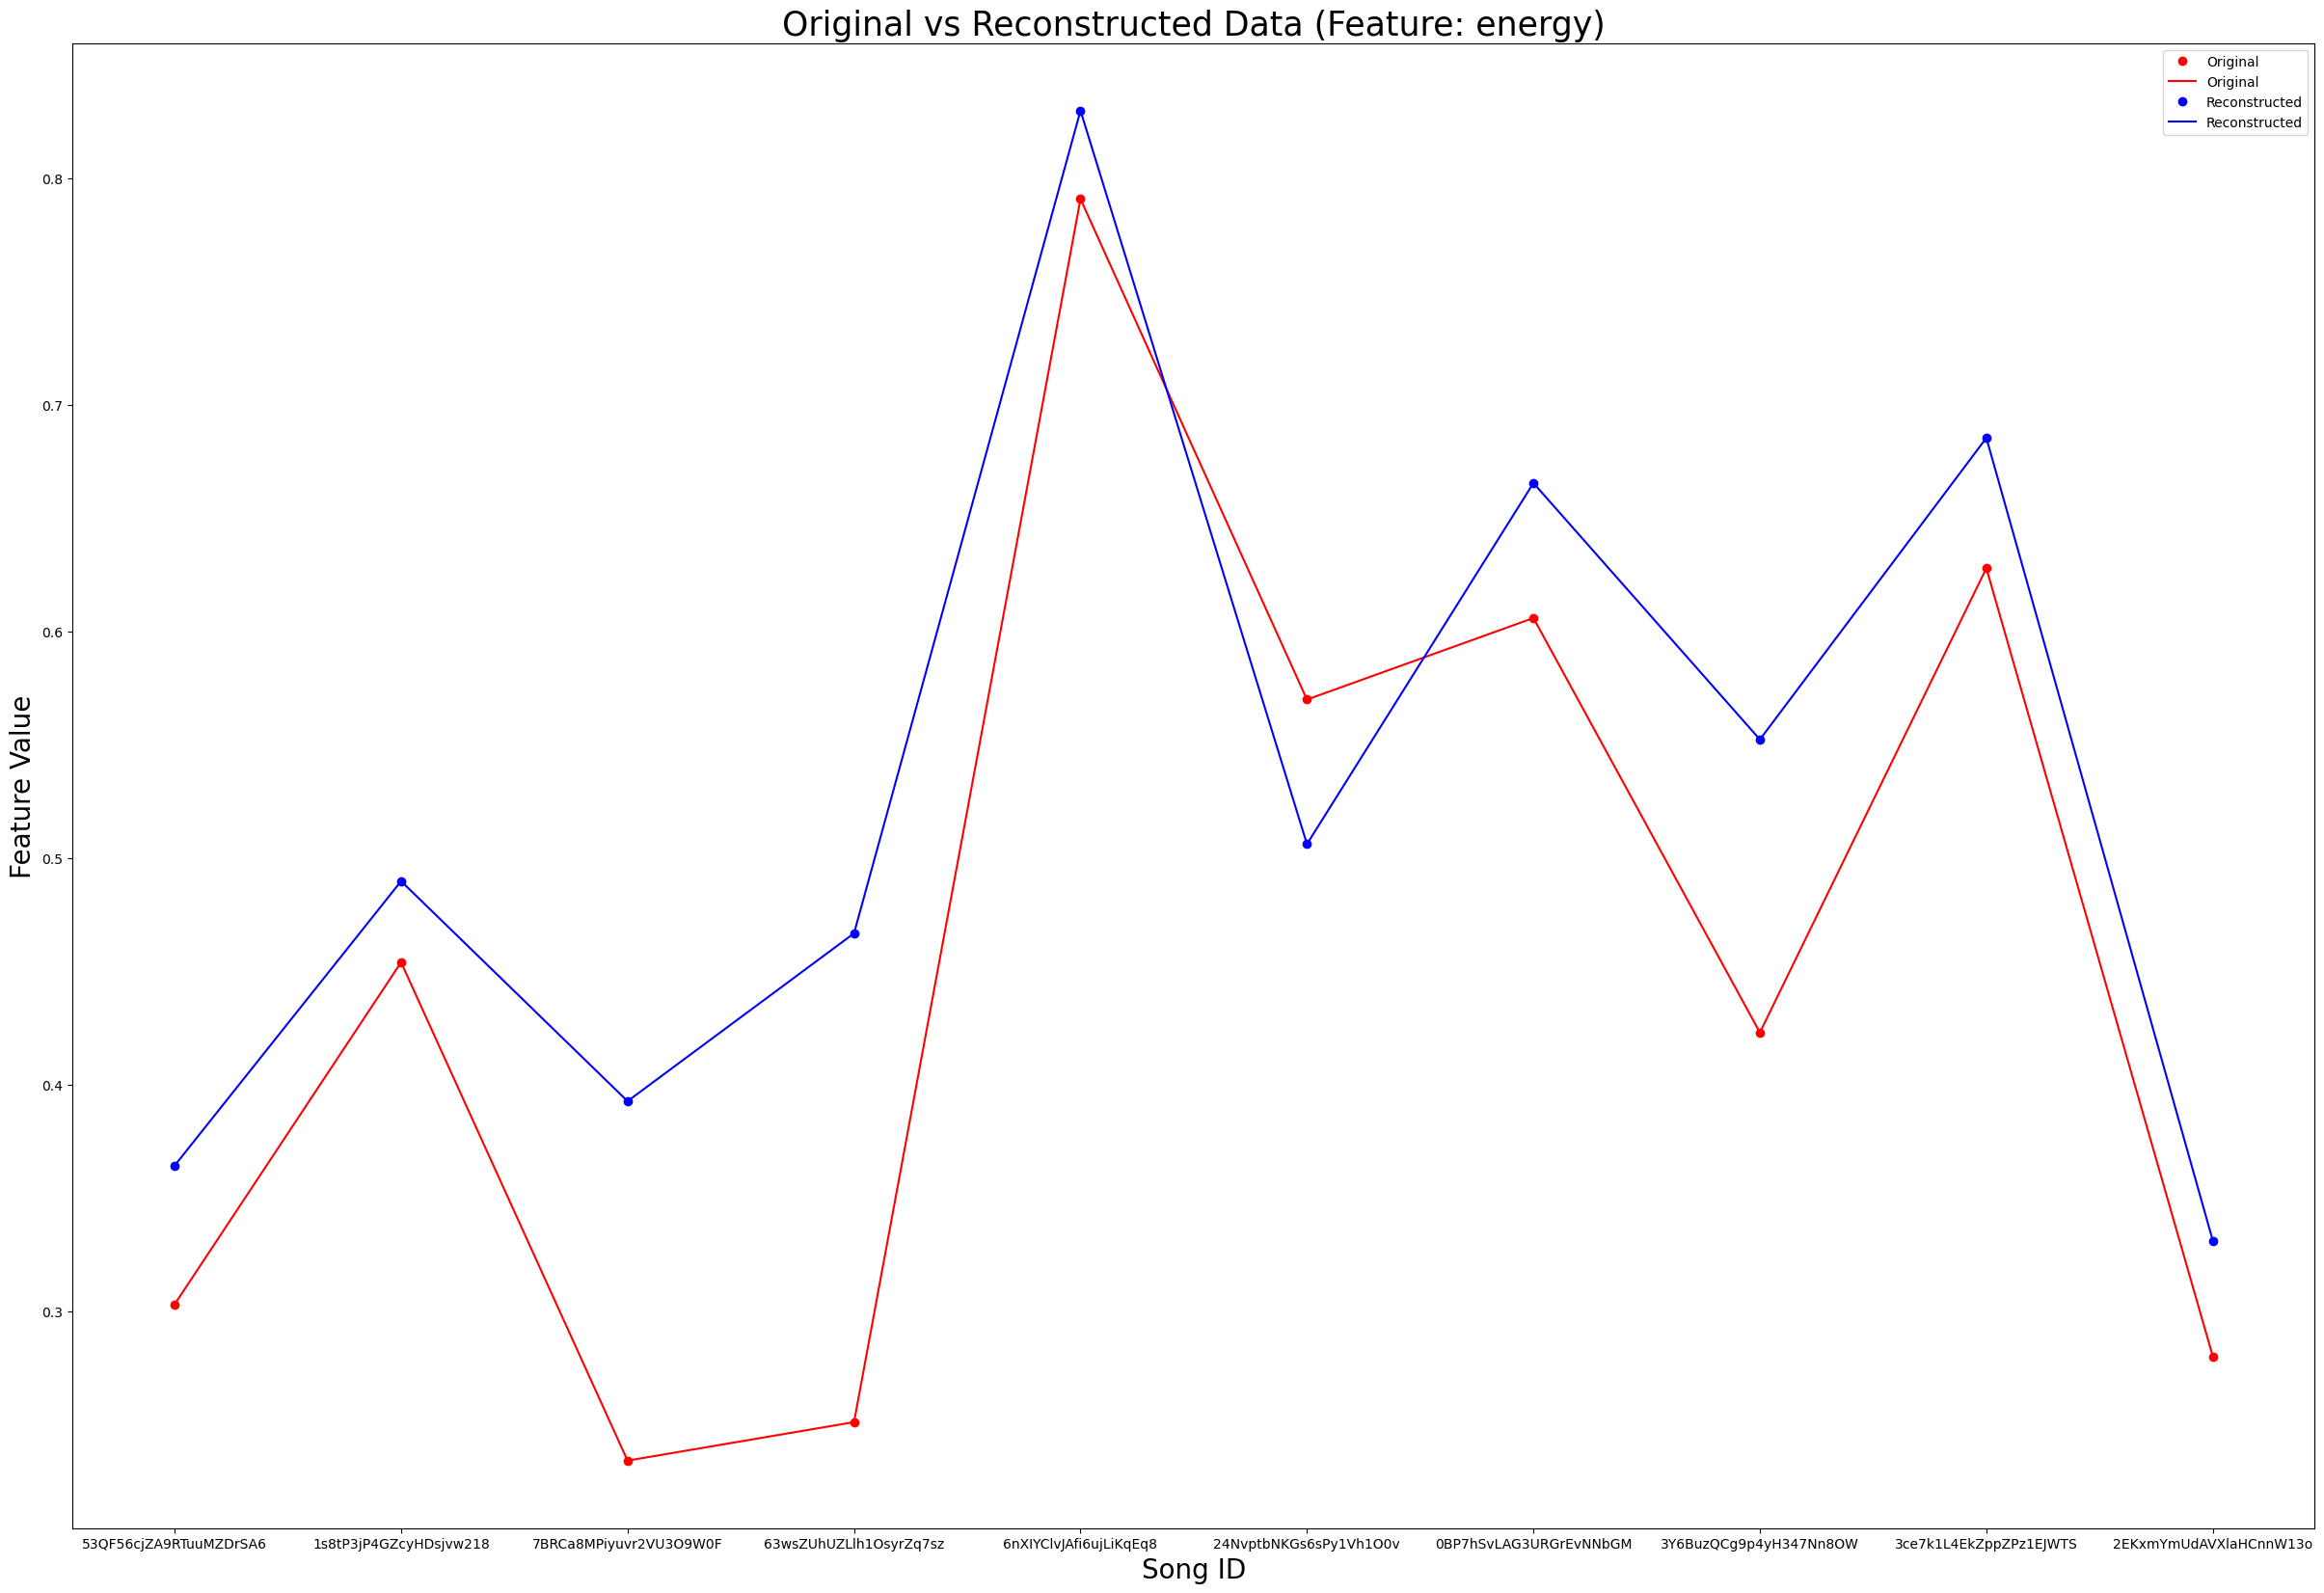

In [14]:
plt.figure(figsize=(30,20))
feature_index = 1  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

## Gradual with relu

In [26]:
input_dim = 9  # Input feature size (9 features)
encoding_dim = 3  # Smallest encoding size (3 features), which is now not needed as per your request.

# Input layer
input_layer = layers.Input(shape=(input_dim,))

# Encoding layers
encoded = layers.Dense(7, activation='relu')(input_layer)  # First encoding layer (9 -> 7)
encoded = layers.Dense(5, activation='relu')(encoded)      # Second encoding layer (7 -> 5)

# Decoding layers
decoded = layers.Dense(7, activation='relu')(encoded)      # First decoding layer (5 -> 7)
decoded = layers.Dense(input_dim, activation='linear')(decoded)  # Final output layer (7 -> 9)

# Autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=decoded)

# Encoder model for extracting the encoded data
encoder = models.Model(inputs=input_layer, outputs=encoded)

# Decoder model for reconstructing from the 5-dimensional representation
encoded_input = layers.Input(shape=(5,))  # Adjust input shape to 5 for decoding
decoder_layer = autoencoder.layers[-2](encoded_input)  # 5 -> 7
decoder_output = autoencoder.layers[-1](decoder_layer)  # 7 -> 9
decoder = models.Model(inputs=encoded_input, outputs=decoder_output)

# Compile the autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Print model summary for reference
autoencoder.summary()

# Train the autoencoder (using the same data for input and output)
history = autoencoder.fit(
    features, features,  # Using scaled data for input and target
    epochs=50,  # Increase if needed
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

# Predict encoded and decoded data
encoded_data = encoder.predict(features)
print("Encoded data shape:", encoded_data.shape)
decoded_data = decoder.predict(encoded_data)  # Pass the encoded data
print("Decoded data shape:", decoded_data.shape)

# Save the models and encoded data
autoencoder.save('model_v1_gradual.h5')
np.save('encoded_song_data_gradual.npy', encoded_data)

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)          │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_110 (Dense)                    │ (None, 7)                   │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_111 (Dense)                    │ (None, 5)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_112 (Dense)                    │ (None, 7)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_113 (Dense)                    │ (None, 9)                   │              72 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224 (896.00 B)

 Trainable params: 224 (896.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 23s 734us/step - loss: 429.0052 - val_loss: 0.0773
Epoch 2/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 21s 729us/step - loss: 0.0541 - val_loss: 0.0421
Epoch 3/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 21s 734us/step - loss: 0.0400 - val_loss: 0.0373
Epoch 4/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 700us/step - loss: 0.0346 - val_loss: 0.0328
Epoch 5/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 692us/step - loss: 0.0316 - val_loss: 0.0325
Epoch 6/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 691us/step - loss: 0.0309 - val_loss: 0.0317
Epoch 7/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 697us/step - loss: 0.0305 - val_loss: 0.0328
Epoch 8/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 689us/step - loss: 0.0303 - val_loss: 0.0324
Epoch 9/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 693us/step - loss: 0.0300 - val_loss: 0.0310
Epoch 10/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 684us/step - loss: 0.0298 - val_loss: 0.0309
Epoch 11/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 20s 678us/step - loss:

Decoded data shape: (1159764, 9)


In [29]:
# decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data[:5])

Original Data (first 5 samples):
[[ 4.83000e-01  3.03000e-01  4.00000e+00 -1.00580e+01  6.94000e-01
   0.00000e+00  1.15000e-01  1.39000e-01  1.33406e+02]
 [ 5.72000e-01  4.54000e-01  3.00000e+00 -1.02860e+01  4.77000e-01
   1.37000e-05  9.74000e-02  5.15000e-01  1.40182e+02]
 [ 4.09000e-01  2.34000e-01  3.00000e+00 -1.37110e+01  3.38000e-01
   5.00000e-05  8.95000e-02  1.45000e-01  1.39832e+02]
 [ 3.92000e-01  2.51000e-01  1.00000e+01 -9.84500e+00  8.07000e-01
   0.00000e+00  7.97000e-02  5.08000e-01  2.04961e+02]
 [ 4.30000e-01  7.91000e-01  6.00000e+00 -5.41900e+00  7.26000e-02
   1.93000e-02  1.10000e-01  2.17000e-01  1.71864e+02]]

Reconstructed Data (first 5 samples):
[[ 5.50157309e-01  5.56495905e-01  3.99481010e+00 -1.00956316e+01
   4.84010965e-01  4.88016605e-02  1.81621760e-01  5.53719878e-01
   1.33415939e+02]
 [ 5.50051033e-01  5.43674648e-01  2.99586678e+00 -1.03044014e+01
   5.09131789e-01  2.04297006e-02  1.79439932e-01  5.71455240e-01
   1.40193115e+02]
 [ 4.89434004e-

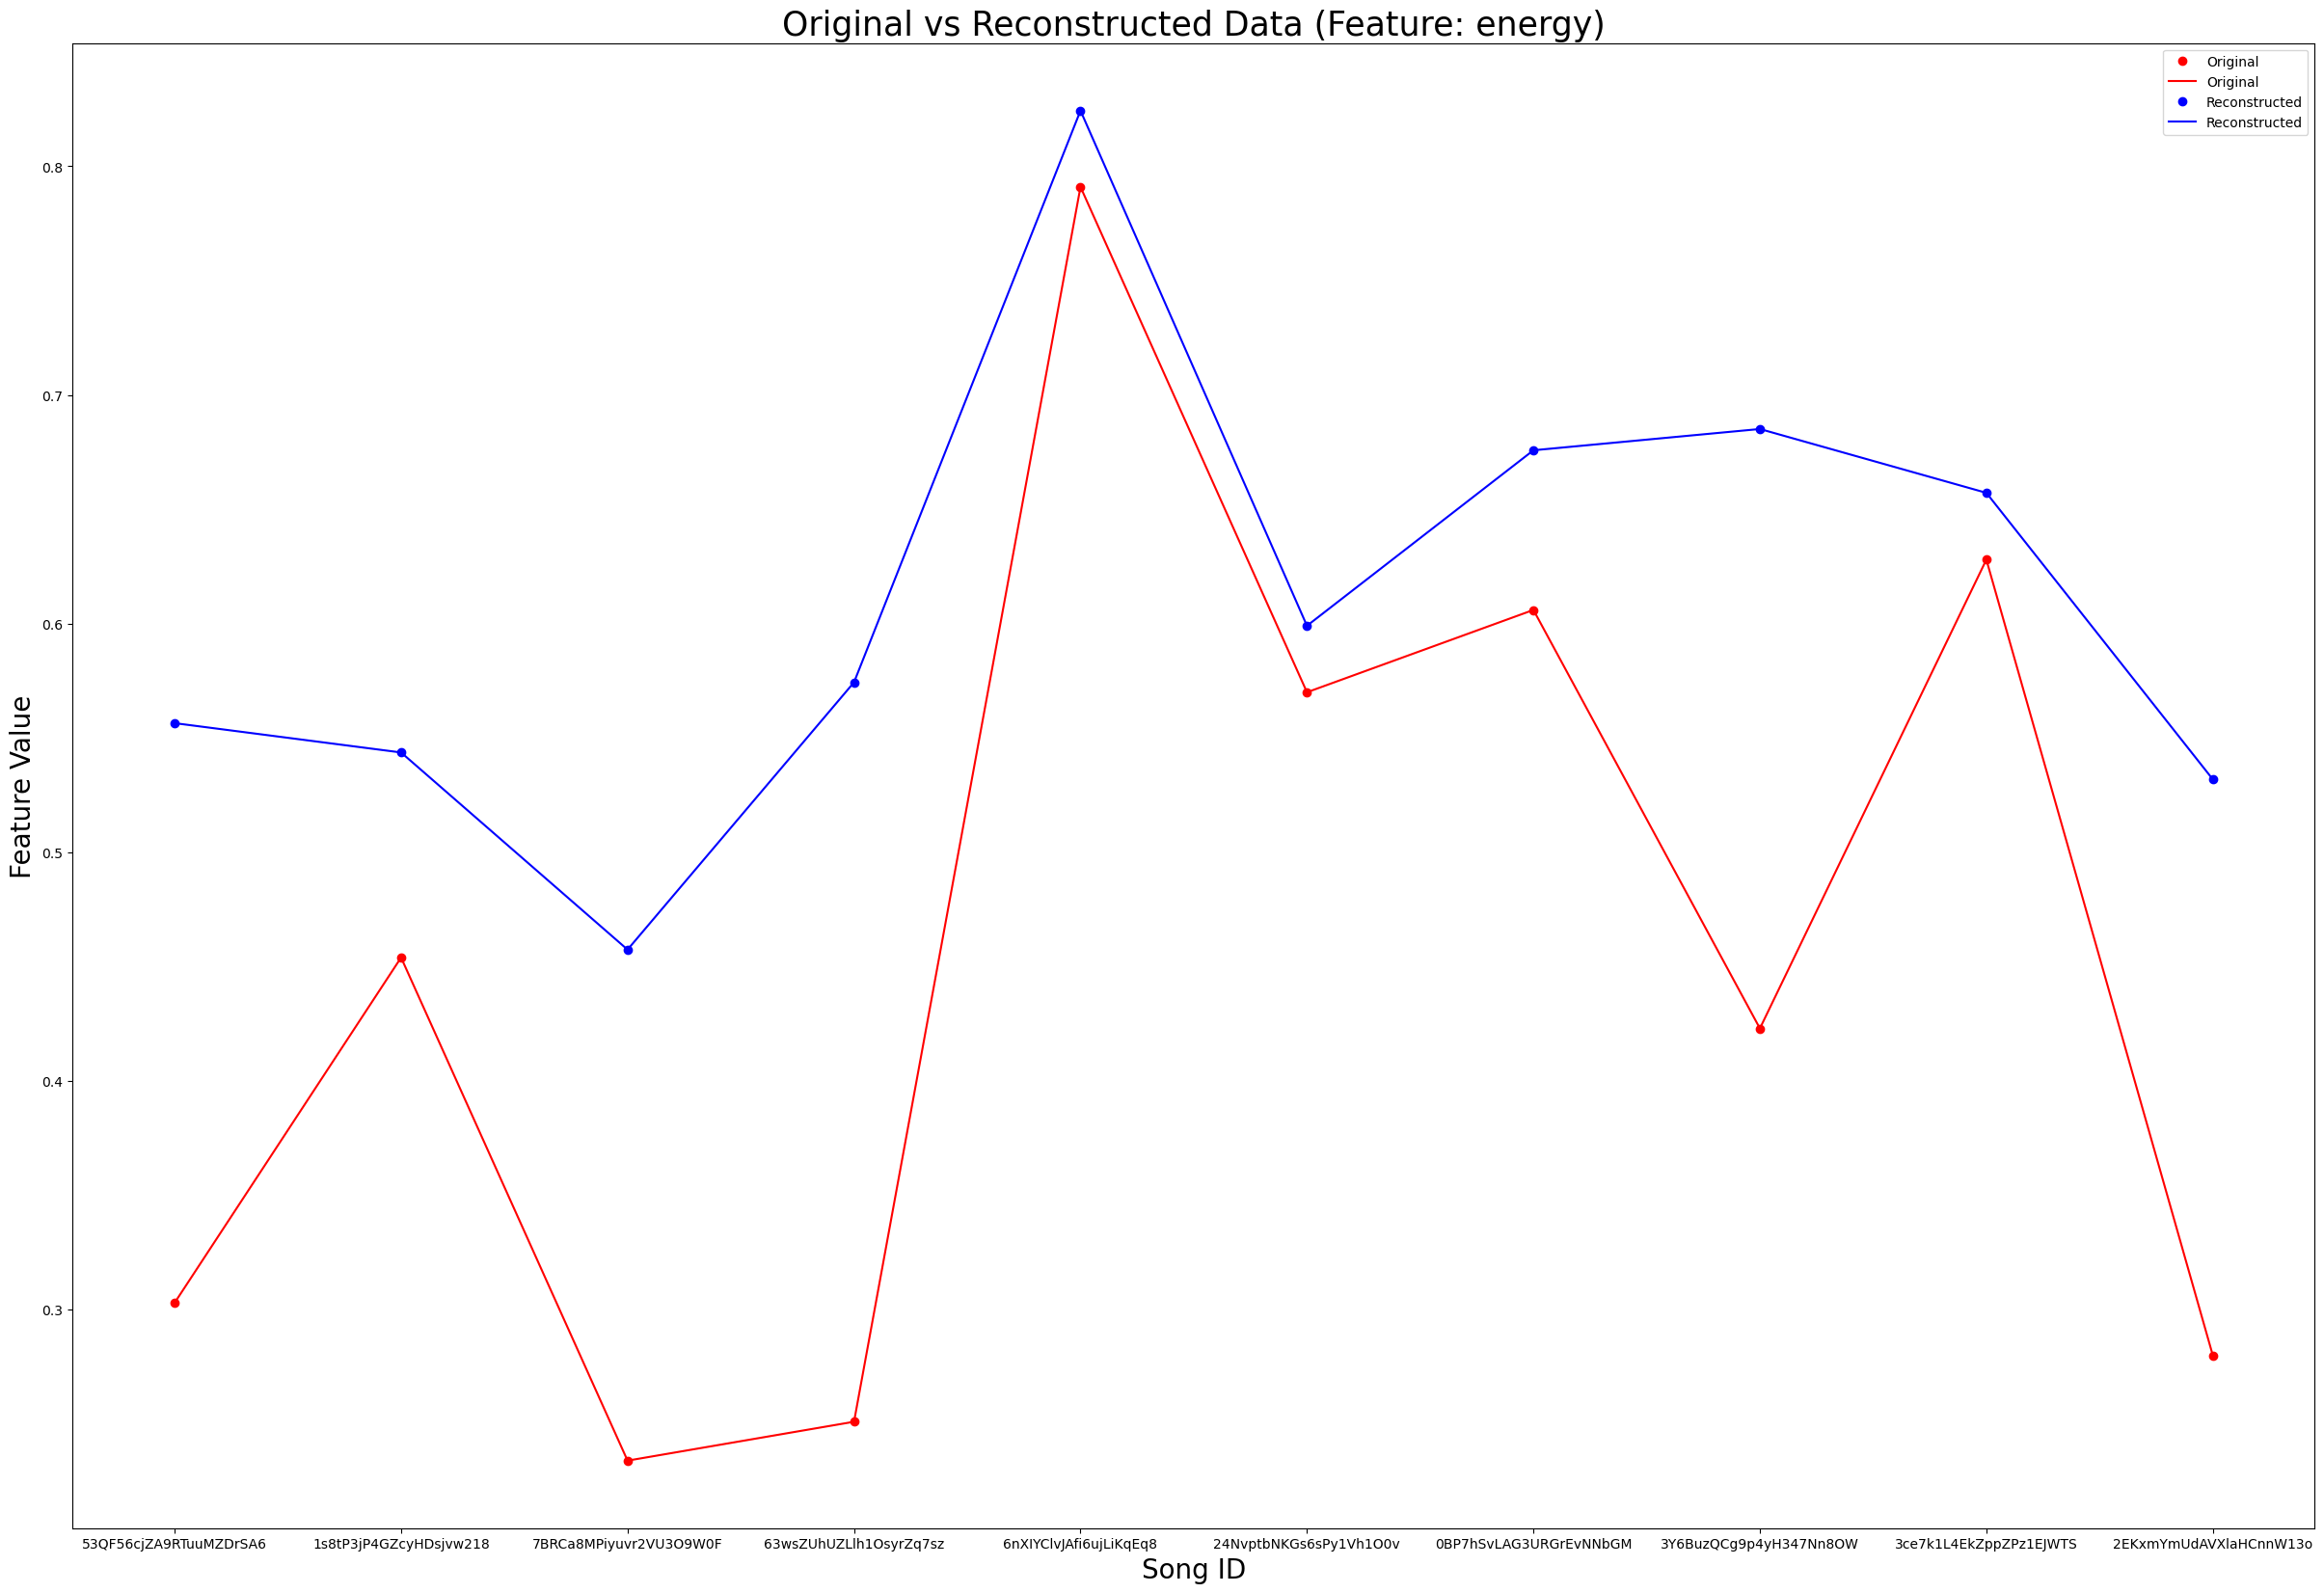

In [30]:
plt.figure(figsize=(30,20))
feature_index = 1  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()

In [25]:
# Define input and bottleneck dimensions
input_dim = 9  # Input feature size (9 features)
encoding_dim = 3  # Smallest encoding size (3 features)

# Input layer
input_layer = layers.Input(shape=(input_dim,))

# Encoding layers
encoded = layers.Dense(32, activation='relu')(input_layer)  # First encoding layer (9 -> 32)
encoded = layers.BatchNormalization()(encoded)  # Batch normalization
encoded = layers.Dense(24, activation='relu')(encoded)  # Second encoding layer (32 -> 24)
encoded = layers.BatchNormalization()(encoded)  # Batch normalization
encoded = layers.Dense(16, activation='relu')(encoded)  # Third encoding layer (24 -> 16)
encoded = layers.BatchNormalization()(encoded)  # Batch normalization
encoded = layers.Dense(12, activation='relu')(encoded)  # Fourth encoding layer (16 -> 12)
encoded = layers.BatchNormalization()(encoded)  # Batch normalization
encoded = layers.Dense(8, activation='relu')(encoded)   # Fifth encoding layer (12 -> 8)
encoded = layers.BatchNormalization()(encoded)  # Batch normalization
encoded = layers.Dense(5, activation='relu')(encoded)  # Sixth encoding layer (8 -> 5)

# Bottleneck layer (3-dimensional compressed representation)
bottleneck = layers.Dense(encoding_dim, activation='relu')(encoded)  # Compression layer (5 -> 3)

# Decoding layers
decoded = layers.Dense(5, activation='relu')(bottleneck)  # First decoding layer (3 -> 5)
decoded = layers.BatchNormalization()(decoded)  # Batch normalization
decoded = layers.Dense(8, activation='relu')(decoded)  # Second decoding layer (5 -> 8)
decoded = layers.BatchNormalization()(decoded)  # Batch normalization
decoded = layers.Dense(12, activation='relu')(decoded)  # Third decoding layer (8 -> 12)
decoded = layers.BatchNormalization()(decoded)  # Batch normalization
decoded = layers.Dense(16, activation='relu')(decoded)  # Fourth decoding layer (12 -> 16)
decoded = layers.BatchNormalization()(decoded)  # Batch normalization
decoded = layers.Dense(24, activation='relu')(decoded)  # Fifth decoding layer (16 -> 24)
decoded = layers.BatchNormalization()(decoded)  # Batch normalization
decoded = layers.Dense(32, activation='relu')(decoded)  # Sixth decoding layer (24 -> 32)

# Output layer (reconstructing the 9-dimensional input)
output_layer = layers.Dense(input_dim, activation='linear')(decoded)  # Final output layer (32 -> 9)

# Autoencoder model
autoencoder = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='mse')

# Print model summary for reference
autoencoder.summary()

# Assuming `scaled_features` is your input data
# Example: scaled_features = np.random.rand(1000, 9)  # Replace with your actual scaled data
# scaled_features = ...  # Load or preprocess your input data here

# Train the autoencoder (using the same data for input and output)
history = autoencoder.fit(
    scaled_features, scaled_features,  # Using scaled data for input and target
    epochs=50,  # Increase if needed
    batch_size=32,
    validation_split=0.2,
    shuffle=True
)

# Predict encoded and decoded data
encoded_data = autoencoder.predict(scaled_features)
print("Encoded data shape:", encoded_data.shape)

# Save the model and encoded data
autoencoder.save('model_v1_deep_autoencoder.h5')
np.save('encoded_song_data_deep_autoencoder.npy', encoded_data)

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)          │ (None, 9)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_97 (Dense)                     │ (None, 24)                  │             792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_98 (Dense)                     │ (None, 16)                  │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_99 (Dense)                     │ (None, 12)                  │             204 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 12)                  │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_100 (Dense)                    │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_101 (Dense)                    │ (None, 5)                   │              45 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 3)                   │              18 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 5)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 5)                   │              20 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 8)                   │              48 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 8)                   │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 12)                  │             1

 Total params: 4,400 (17.19 KB)

 Trainable params: 4,086 (15.96 KB)

 Non-trainable params: 314 (1.23 KB)

Epoch 1/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step - loss: 0.6848 - val_loss: 0.3915
Epoch 2/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step - loss: 0.4279 - val_loss: 0.3433
Epoch 3/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - loss: 0.3942 - val_loss: 0.3212
Epoch 4/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - loss: 0.3761 - val_loss: 0.3098
Epoch 5/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 0.3639 - val_loss: 0.2992
Epoch 6/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 72s 2ms/step - loss: 0.3554 - val_loss: 0.2934
Epoch 7/50
28995/28995 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - loss: 0.3475 - val_loss: 0.2877
Epoch 8/50
 8472/28995 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 0.3429

KeyboardInterrupt: 

In [ ]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

# Custom Tanh

In [22]:
def custom_tanh(x, scale=1.5, shift=0.5):
    return scale * tf.tanh(x) + shift

In [18]:
input_dim = scaled_features.shape[1]
encoding_dim = 5


custom_activation = tf.keras.layers.Activation(custom_tanh)

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation=custom_activation)(input_layer)
encoded = layers.Dropout(0.2)(encoded)
# decoded_additional=layers.Dense(encoding_dim,activation='tanh')(encoded)
# decoded_additional=layers.Dropout(0.2)(decoded_additional)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

# autoencoder = models.Model(input_layer, decoded)
# encoder = models.Model(input_layer, encoded)

# autoencoder.compile(optimizer='adam', loss='mse')
# autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

autoencoder = models.Model(input_layer, decoded)
encoder = models.Model(input_layer, encoded)
decoder_input = layers.Input(shape=(encoding_dim,))
decoder_output = autoencoder.layers[-1](decoder_input)
decoder = models.Model(decoder_input, decoder_output)
optimizer = optimizers.Adafactor(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')
autoencoder.fit(scaled_features, scaled_features, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

encoded_data = encoder.predict(scaled_features)
decoded_data = decoder.predict(encoded_data)


Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 3s 720us/step - loss: 1.1607 - val_loss: 0.3872
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 541us/step - loss: 0.4698 - val_loss: 0.3262
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 599us/step - loss: 0.4317 - val_loss: 0.2900
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 576us/step - loss: 0.3859 - val_loss: 0.2440
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - loss: 0.3536 - val_loss: 0.2290
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 610us/step - loss: 0.3454 - val_loss: 0.2228
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 625us/step - loss: 0.3438 - val_loss: 0.2193
Epoch 8/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 641us/step - loss: 0.3405 - val_loss: 0.2166
Epoch 9/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 631us/step - loss: 0.3373 - val_loss: 0.2157
Epoch 10/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 1s 548us/step - loss: 0.3356 - val_loss: 0.2140
Epoch 11/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 612us/step - loss: 0.3386 - val_loss: 0.2142
Epoch 12

In [19]:
decoded_data_original_scale = scaler.inverse_transform(decoded_data)
print("Original Data (first 5 samples):")
print(original_data[:5])
print("\nReconstructed Data (first 5 samples):")
print(decoded_data_original_scale[:5])

Original Data (first 5 samples):
[[ 7.25000e-01  5.53000e-01 -6.31900e+00  3.40000e-02  2.76000e-01
   7.02000e-06  1.85000e-01  7.29000e-01  9.00090e+01]
 [ 2.77000e-01  1.64000e-01 -1.67430e+01  3.73000e-02  8.78000e-01
   1.81000e-04  3.35000e-01  1.84000e-01  8.93080e+01]
 [ 4.86000e-01  9.27000e-01 -4.84500e+00  4.28000e-02  2.95000e-06
   1.45000e-02  9.52000e-02  3.77000e-01  1.35540e+02]
 [ 4.11000e-01  4.42000e-01 -1.27450e+01  2.70000e-02  4.85000e-01
   9.26000e-01  1.91000e-01  1.72000e-01  1.74019e+02]
 [ 7.48000e-01  6.60000e-01 -4.64800e+00  2.71000e-01  1.25000e-01
   0.00000e+00  7.83000e-02  4.00000e-01  7.55830e+01]]

Reconstructed Data (first 5 samples):
[[ 6.88260674e-01  6.37771070e-01 -7.20804024e+00  6.99575394e-02
   3.17460179e-01  2.65860986e-02  1.53929263e-01  6.50592446e-01
   9.83027725e+01]
 [ 3.22205573e-01  2.47197837e-01 -1.53653555e+01  6.05792031e-02
   8.50416303e-01  7.04846382e-02  2.83713967e-01  2.24783167e-01
   9.27946396e+01]
 [ 5.03678381e-

In [20]:
og_data=data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
mse = np.mean(np.square(og_data - decoded_data_original_scale), axis=1)
print(f"\nMean Squared Error (first 5 samples): {mse[:5]}")


Mean Squared Error (first 5 samples): 882616     7.732936
621408     1.563785
927704     1.143827
439351    29.226133
266036    10.402662
dtype: float64


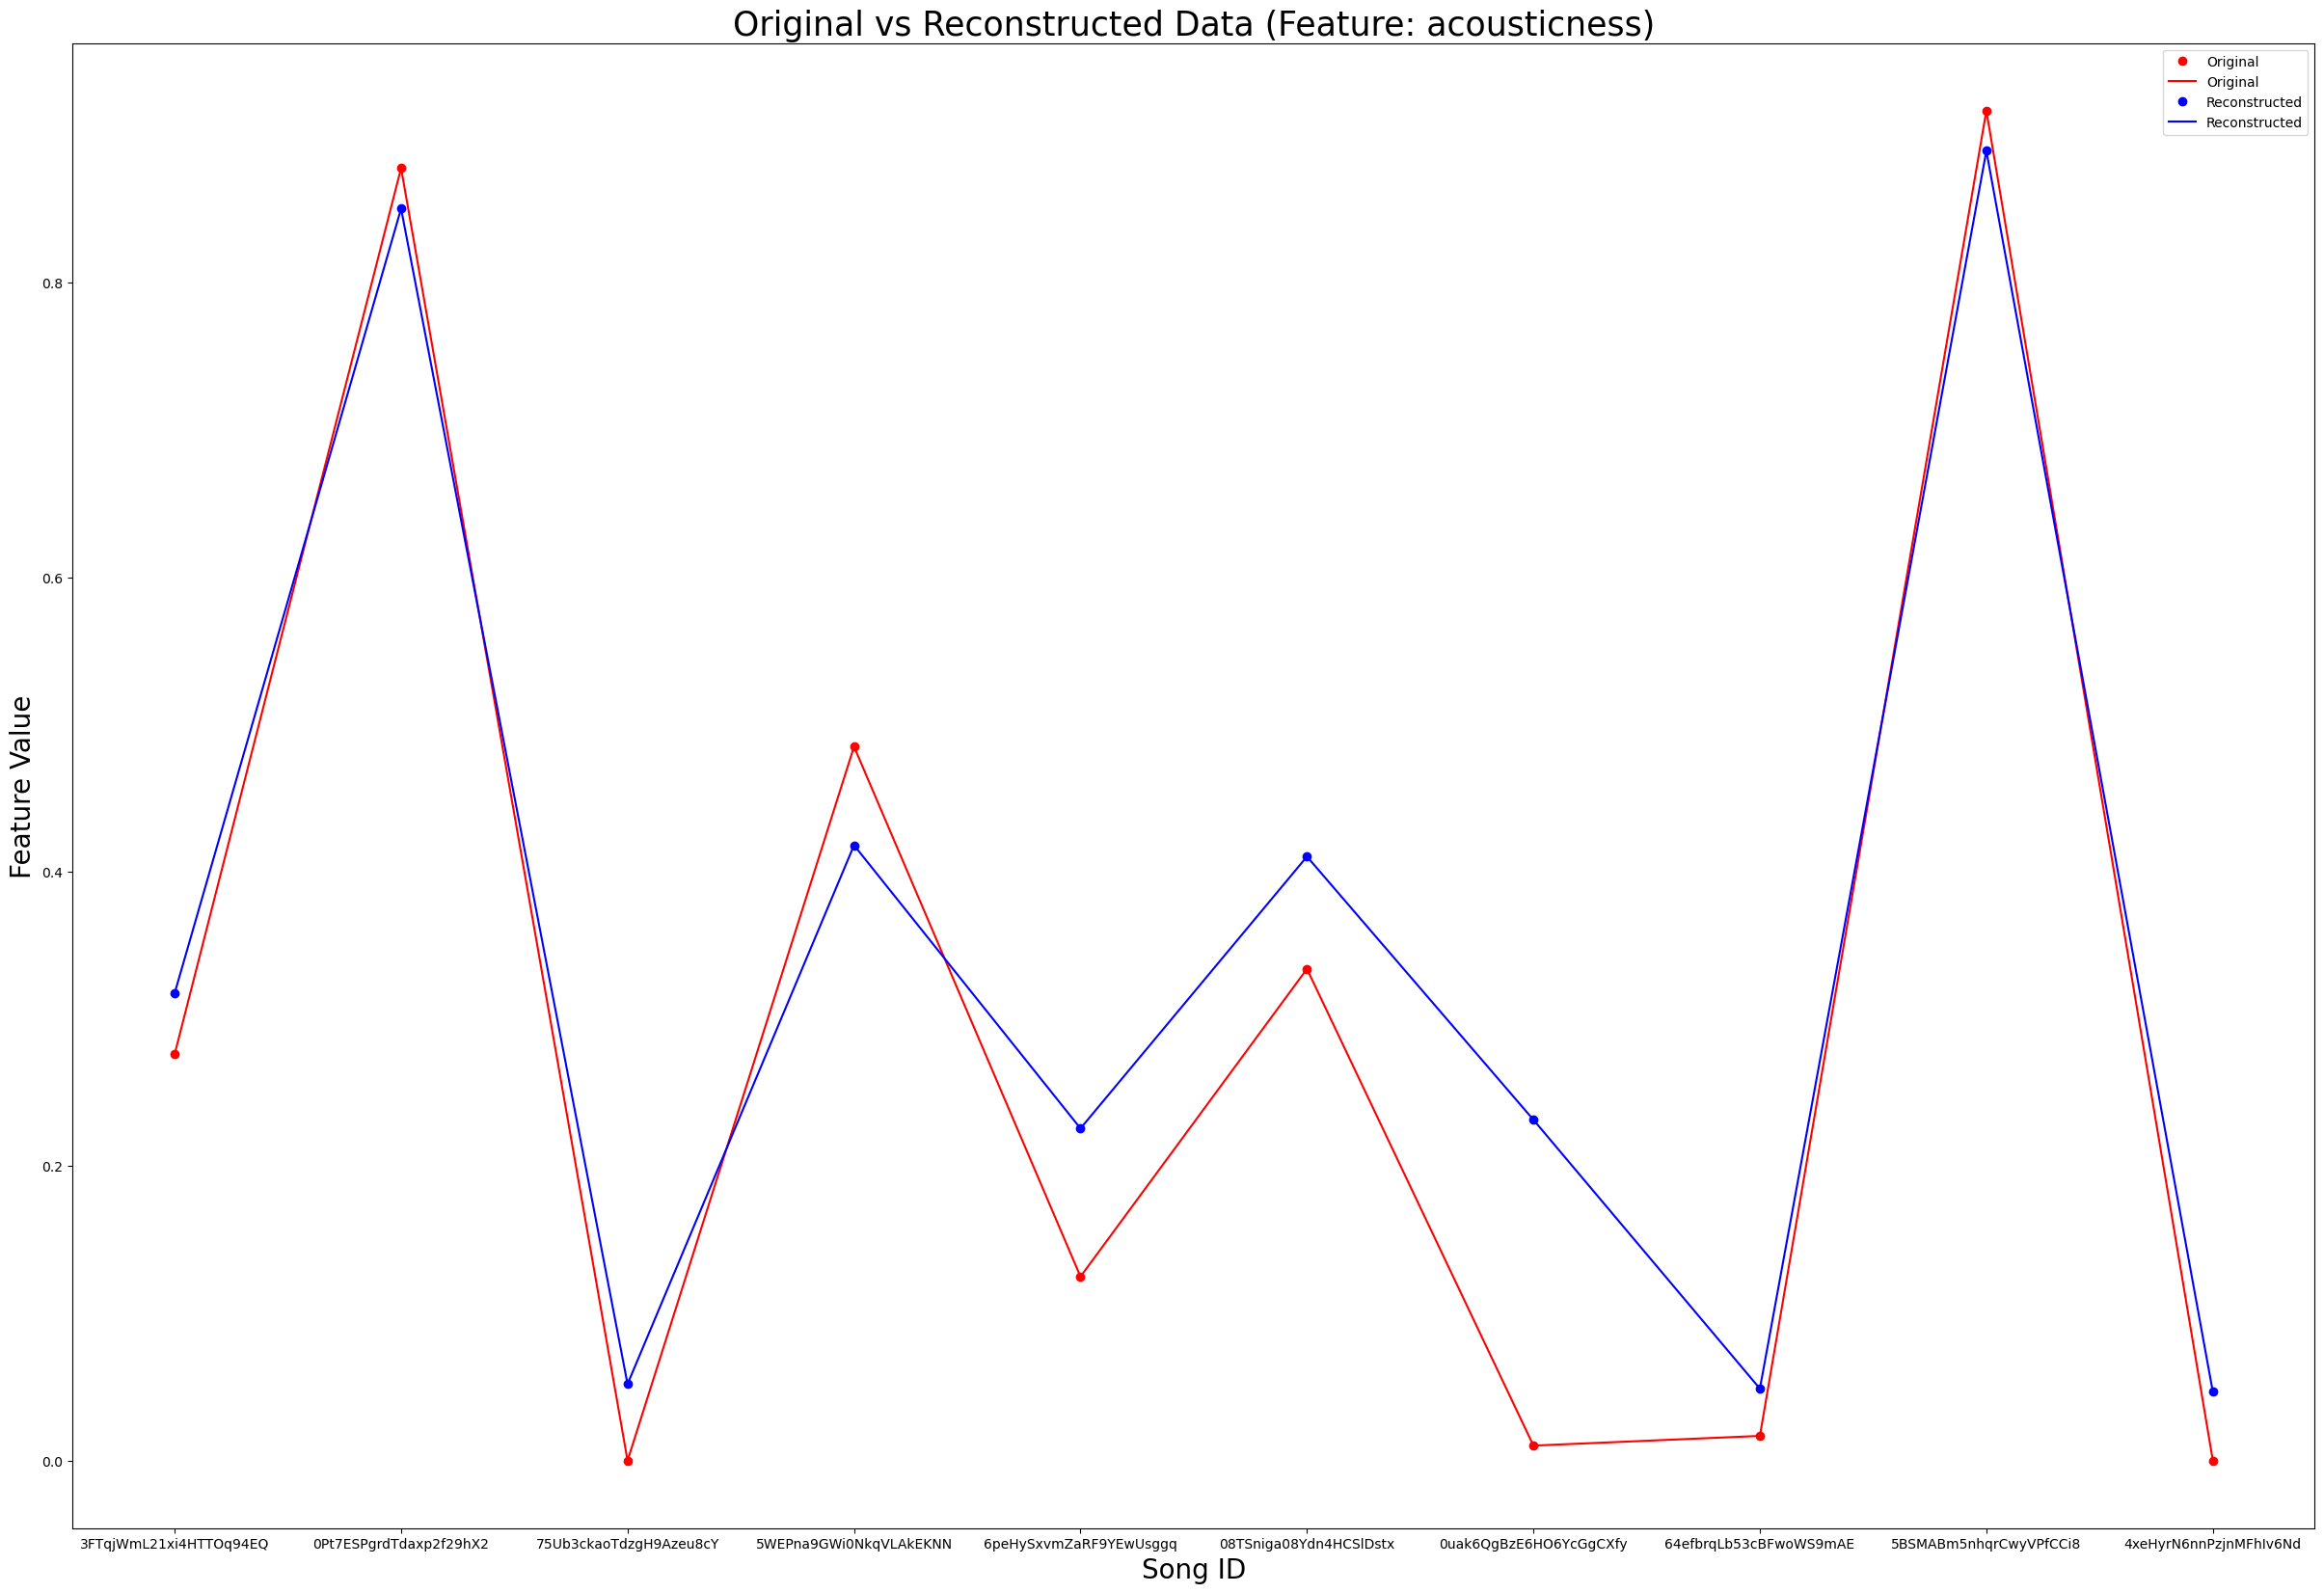

In [35]:
plt.figure(figsize=(30,20))
feature_index = 4  # Choose a feature to plot, e.g., 'speechiness'
plt.plot(d[:10,0],d[:10, feature_index+1],'o',color='red', label='Original')
plt.plot(d[:10,0],d[:10, feature_index+1],linestyle='-',color='red', label='Original')
plt.plot(decoded_data_original_scale[:10, feature_index],'o',color='blue', label='Reconstructed')
plt.plot(decoded_data_original_scale[:10, feature_index],linestyle='-',color='blue', label='Reconstructed')
plt.xlabel('Song ID',fontsize=20)
plt.ylabel('Feature Value',fontsize=20)
plt.title(f'Original vs Reconstructed Data (Feature: {list(features.columns)[feature_index]})',fontsize=25)
plt.legend()
plt.show()